A series of tests of the SLIP package.

In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fopts = {'fontsize':18}

In [2]:
from SLIP import Image, imread

In [3]:
help(Image)

Help on class Image in module SLIP.SLIP:

class Image(builtins.object)
 |  This library collects different Image Processing tools.
 |  
 |  Fork me on https://github.com/bicv/SLIP !
 |  
 |  This library is used in other projects, in particular  for use with the ``LogGabor`` and ``SparseEdges`` libraries
 |  For more information check respective pages @
 |      - http://pythonhosted.org/LogGabor and
 |      - http://pythonhosted.org/SparseEdges
 |  
 |  Collects image processing routines for one given image size:
 |   - Some classical related to pure Fourier number crunching:
 |      - creating masks
 |      - normalize,
 |      - fourier_grid : defines a useful grid for generating filters in FFT
 |      - show_FT : displays the envelope and impulse response of a filter
 |      - invert : go to the other of the fourier transform
 |  - Some usual application of Fourier filtering:
 |      - trans : translation filter in Fourier space
 |      - whitening procedures
 |   - Some related to 

## initializing the SLIP object

The SLIP object may be initialized by giving some parameters. These could be given using 

- nothing

In [4]:
im = Image()  # default is 'https://raw.githubusercontent.com/bicv/SLIP/master/default_param.py'
print(im.pe)

{'white_steepness': 4.0, 'N_X': 256, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 256, 'figsize': 14.0}


- a dictionary (dimensions ``N_X`` and ``N_Y`` and ``mask_exponent`` are mandatory)

In [5]:
im = Image({'N_X':32, 'N_Y':64})
print(im.pe)

{'verbose': 30, 'N_X': 32, 'mask_exponent': 3.0, 'N_Y': 64}


- a ``ndarray`` (dimensions ``N_X`` and ``N_Y`` are guessed from this array)

In [6]:
im = Image(np.empty((32, 64)))
print(im.pe)

{'verbose': 30, 'N_X': 32, 'mask_exponent': 3.0, 'N_Y': 64}


- a string indicating the path of a image file

In [7]:
im = Image('database/lena64.png')
print(im.pe)

{'verbose': 30, 'N_X': 64, 'mask_exponent': 3.0, 'N_Y': 64}


- a string indicating the URL to a image file

In [8]:
im = Image('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
print(im.pe)

{'verbose': 30, 'N_X': 1058, 'mask_exponent': 3.0, 'N_Y': 1058}


- a string indicating the path of a file containing a dictionary

In [9]:
im = Image('file://default_param.py')
im = Image('default_param.py')
print(im.pe.keys())

dict_keys(['white_steepness', 'N_X', 'matpath', 'white_N', 'seed', 'figpath', 'white_alpha', 'white_name_database', 'N_image', 'ext', 'verbose', 'white_recompute', 'mask_exponent', 'do_mask', 'datapath', 'white_f_0', 'white_n_learning', 'N_Y', 'figsize'])


- a string indicating the URL of a file containing a dictionary

In [10]:
im = Image('https://raw.githubusercontent.com/bicv/SLIP/master/default_param.py')
print(im.pe.keys())

dict_keys(['white_steepness', 'N_X', 'matpath', 'white_N', 'seed', 'figpath', 'white_alpha', 'white_name_database', 'N_image', 'ext', 'verbose', 'white_recompute', 'mask_exponent', 'do_mask', 'datapath', 'white_f_0', 'white_n_learning', 'N_Y', 'figsize'])


- a NeuroTools object

In [11]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
im = Image(ParameterSet({'N_X':128, 'N_Y':256}))

The parameters may be handled using the properties of the ``ParameterSet`` object.

## resizing the SLIP object

The SLIP object may be adapted to a new size

- nothing

In [12]:
help(im.set_size)

Help on method set_size in module SLIP.SLIP:

set_size(im) method of SLIP.SLIP.Image instance
    Re-initializes the Image class with  the size given in ``im``
    
    May take as input:
    
    - a numpy array,
    - a string representing a file or URL pointing to an image file
    - a tuple
    
    Updated parameters are
    
    - N_X and N_Y which are respectively the number of pixels in the vertical and horizontal dimensions respectively (MANDATORY)



In [13]:
im = Image()  # default is {'N_X':128, 'N_Y':128}
print(im.pe)

{'white_steepness': 4.0, 'N_X': 256, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 256, 'figsize': 14.0}


In [14]:
im.set_size((512, 234))
print(im.pe)

{'white_steepness': 4.0, 'N_X': 512, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 234, 'figsize': 14.0}


In [15]:
im.set_size(np.ones((512, 234)))
print(im.pe)

{'white_steepness': 4.0, 'N_X': 512, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 234, 'figsize': 14.0}


In [16]:
im.set_size('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
print(im.pe)

{'white_steepness': 4.0, 'N_X': 1058, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 1058, 'figsize': 14.0}


## testing logging

we use https://docs.python.org/3.4/library/logging.html to handle logging of events

In [17]:
im = Image()
print('Verbosity level=', im.pe.verbose)

Verbosity level= 30


In [18]:
im.log.debug(' > this should not appear')
im.log.info(' > this should not appear')
im.log.error(' > this *should* appear')

In [19]:
im.pe.verbose = 15
im.init_logging()
im.log.debug(' > this should not appear')
im.log.info(' > this *should* appear')
im.log.error(' > this *should* appear')

## basic parameter check

TODO

In [20]:
try:
    Image({'N_X':128, 'N_Y':-12, 'mask_exponent':3})
except Exception as e:
    print(e) 

negative dimensions are not allowed


## testing reading an image file

Note that if the image is of a different size, the size of the ``Image`` object is adapted:

In [21]:
im = Image()
print(im.pe)
image = im.imread('database/lena64.png')
print(im.pe)

{'white_steepness': 4.0, 'N_X': 256, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 256, 'figsize': 14.0}
{'white_steepness': 4.0, 'N_X': 64, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 64, 'figsize': 14.0}


In [22]:
image = im.imread('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
print(im.pe)

{'white_steepness': 4.0, 'N_X': 1058, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 1058, 'figsize': 14.0}


## testing showing an image file



In [23]:
'N_X' in im.pe.keys()


True

{'white_steepness': 4.0, 'N_X': 256, 'matpath': 'cache/', 'white_N': 0.07, 'seed': None, 'figpath': 'results/', 'white_alpha': 1.4, 'white_name_database': 'serre07_distractors', 'N_image': None, 'ext': '.pdf', 'verbose': 30, 'white_recompute': False, 'mask_exponent': 3.0, 'do_mask': False, 'datapath': 'database/', 'white_f_0': 0.38, 'white_n_learning': 0, 'N_Y': 256, 'figsize': 14.0}


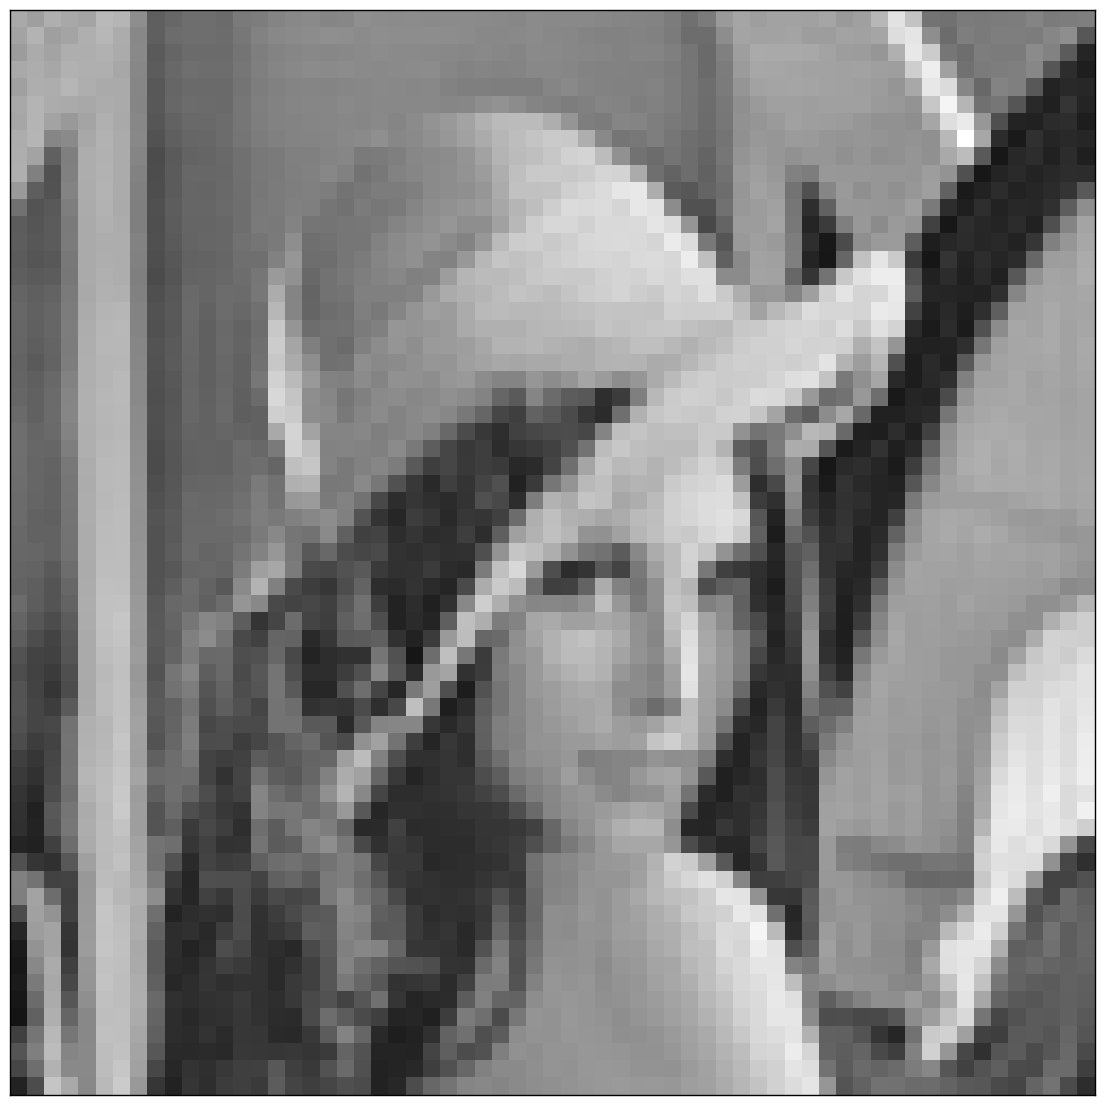

In [24]:
im = Image()
print(im.pe)
image = im.imread('database/lena64.png')
_ = im.imshow(image)

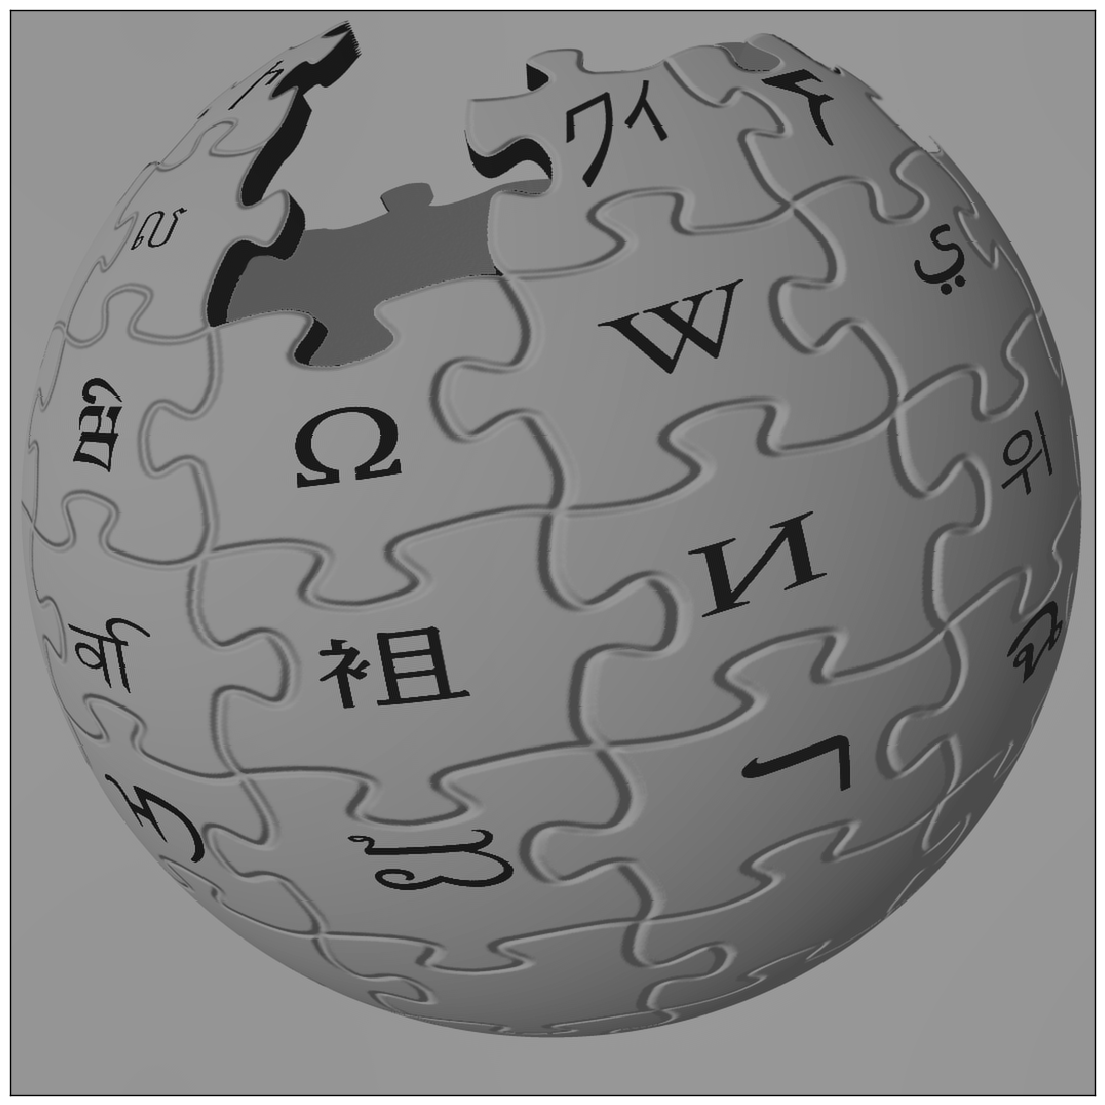

In [25]:
image = im.imread('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
_ = im.imshow(image)

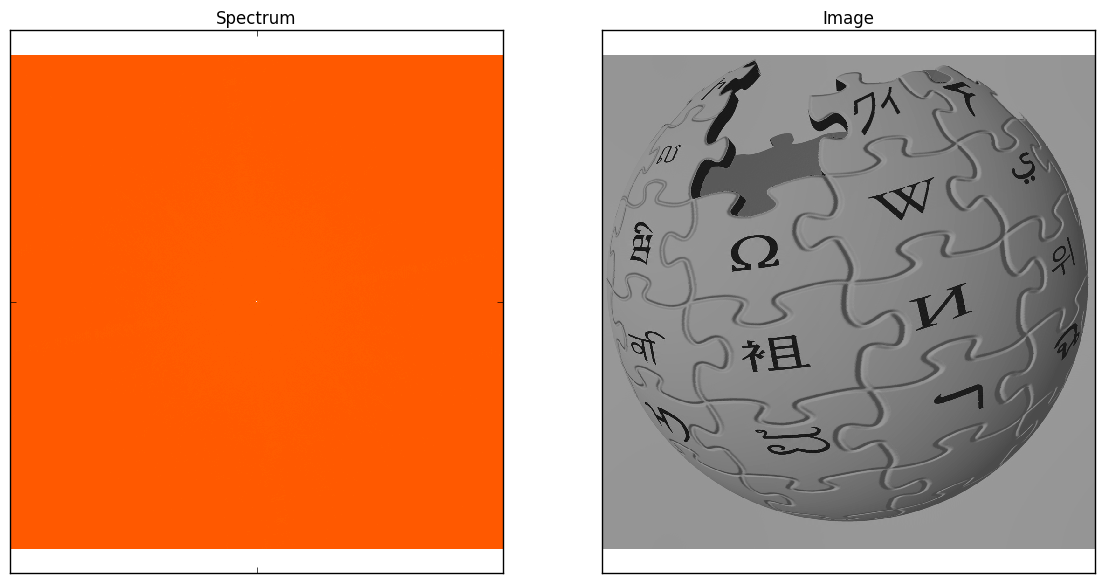

In [26]:
_ = im.show_spectrum(image)

## testing import and cropping

Using image  B_ani37.jpg
Cropping @ [top, bottom, left, right]:  [44, 76, 60, 188]
Using image  H_N42094.jpg
Cropping @ [top, bottom, left, right]:  [92, 124, 66, 194]
Using image  B_ani30.jpg
Cropping @ [top, bottom, left, right]:  [79, 111, 123, 251]
Using image  M_N77054.jpg
Cropping @ [top, bottom, left, right]:  [90, 122, 6, 134]
Using image  Bda_art1079.jpg
Cropping @ [top, bottom, left, right]:  [185, 217, 69, 197]
Using image  Mda_gre178.jpg
Cropping @ [top, bottom, left, right]:  [176, 208, 117, 245]
Using image  Bdn_text119.jpg
Cropping @ [top, bottom, left, right]:  [14, 46, 46, 174]
Using image  Hda_obj47.jpg
Cropping @ [top, bottom, left, right]:  [130, 162, 95, 223]


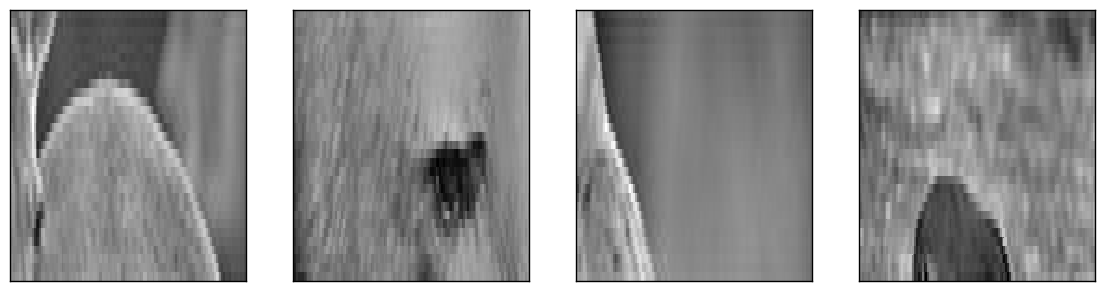

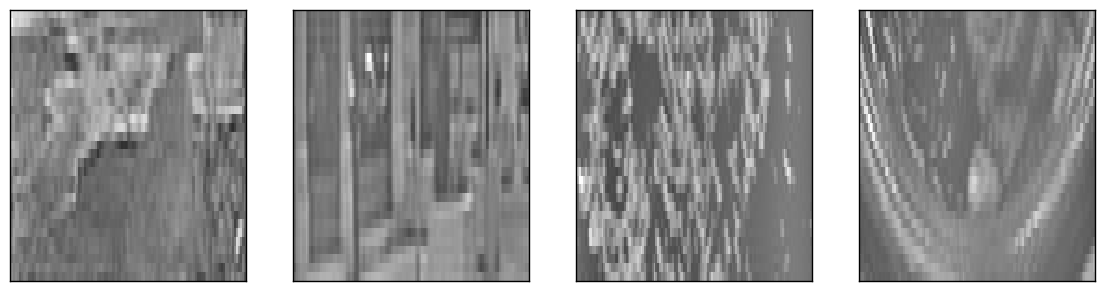

In [27]:
axs = []
im = Image({'N_X':32, 'N_Y':128, 'seed':None, 'do_mask':False})
im.pe.datapath = 'database/'
for name_database in ['serre07_targets', 'serre07_distractors']:
    fig = plt.figure(figsize=(14, 3.5))
    for _ in range(4):
        image, filename, croparea = im.patch(name_database, )
        ax = fig.add_subplot(1, 4, _+1)
        im.imshow(image, fig=fig, ax=ax)
    fig.show()

## Handling a database

In [28]:
im = Image({'N_X':64, 'N_Y':128, 'seed':None, 'do_mask':False, 'N_image':10})
im.pe.datapath = 'database/'
help(im.make_imagelist)
# extract one image list from a database
imagelist = im.make_imagelist('serre07_targets')
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])

Help on method make_imagelist in module SLIP.SLIP:

make_imagelist(name_database, verbose=False) method of SLIP.SLIP.Image instance
    Makes a list of images with no repetition.
    
    Takes as an input the name of a database (the name of a folder in the ``datapath``),
    returns a list of the filenames along with the crop area.

Number of images: 10
First image: ['H_N130033.jpg', [2, 66, 1, 129]]


In [29]:
help(im.get_imagelist)
im.pe.figpath, im.pe.matpath = '/tmp/fig', '/tmp/mat'
# store one image list from a database
imagelist = im.get_imagelist('classifier', 'serre07_targets')
!ls -l /tmp/mat
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])

Help on method get_imagelist in module SLIP.SLIP:

get_imagelist(exp, name_database='natural') method of SLIP.SLIP.Image instance
    returns an imagelist from a pickled database.
    
    If the stored imagelist does not exist, creates it.
    The ``exp`` string allows to tag the list for a particular experiment.

total 8
-rw-r--r--  1 lolo  wheel  386 Nov  8 09:18 classifier_serre07_targets_images.pickle
Number of images: 10
First image: ['B_N77061.jpg', [169, 233, 84, 212]]


In [30]:
im = Image({'N_X':128, 'N_Y':128, 'seed':None, 'do_mask':False, 'N_image':10})
im.pe.figpath, im.pe.matpath = '/tmp/fig', '/tmp/mat'
# now we can access again this stored list
!ls -l /tmp/mat
imagelist = im.get_imagelist('classifier', 'serre07_targets')
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])

total 8
-rw-r--r--  1 lolo  wheel  386 Nov  8 09:18 classifier_serre07_targets_images.pickle
Number of images: 10
First image: ['B_N77061.jpg', [169, 233, 84, 212]]


## checking basic translation mechanism

defining a reference test image; check the axis labels for a (x,y) translation

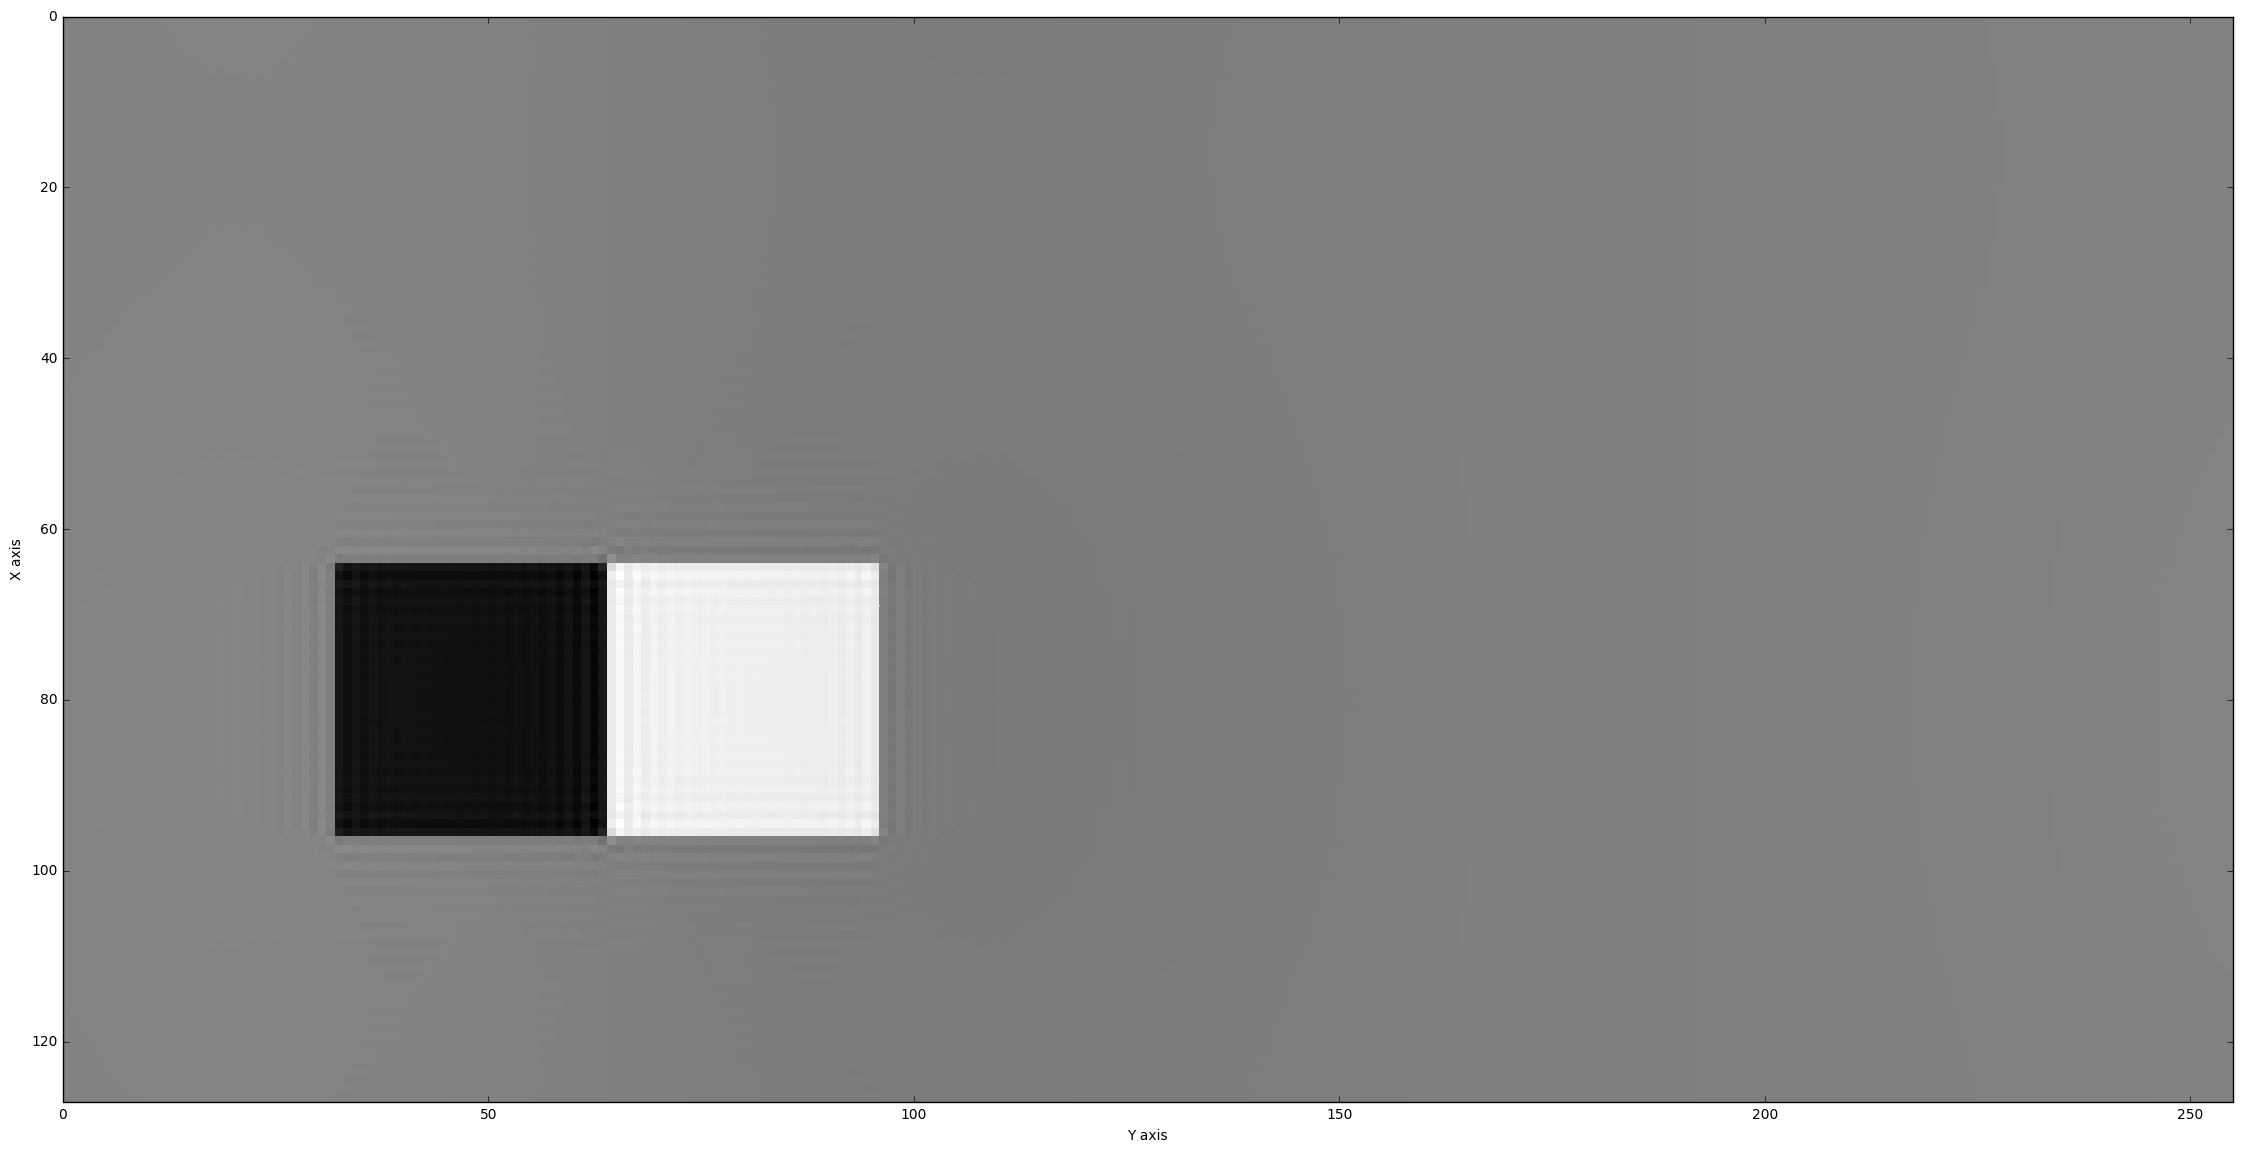

In [31]:
im = Image({'N_X':128, 'N_Y':256})
image = np.zeros((im.pe.N_X, im.pe.N_Y))
image[im.pe.N_X/2:im.pe.N_X/2+im.pe.N_X/4, im.pe.N_X/2:im.pe.N_X/2+im.pe.N_X/4] = 1 # white square on the right
image[im.pe.N_X/2:im.pe.N_X/2+im.pe.N_X/4, im.pe.N_X/4:im.pe.N_X/2] = -1  # black square on its left
_ = im.imshow(image, axis=True)

translating the image by an integer by rolling indices


16.0 64.0


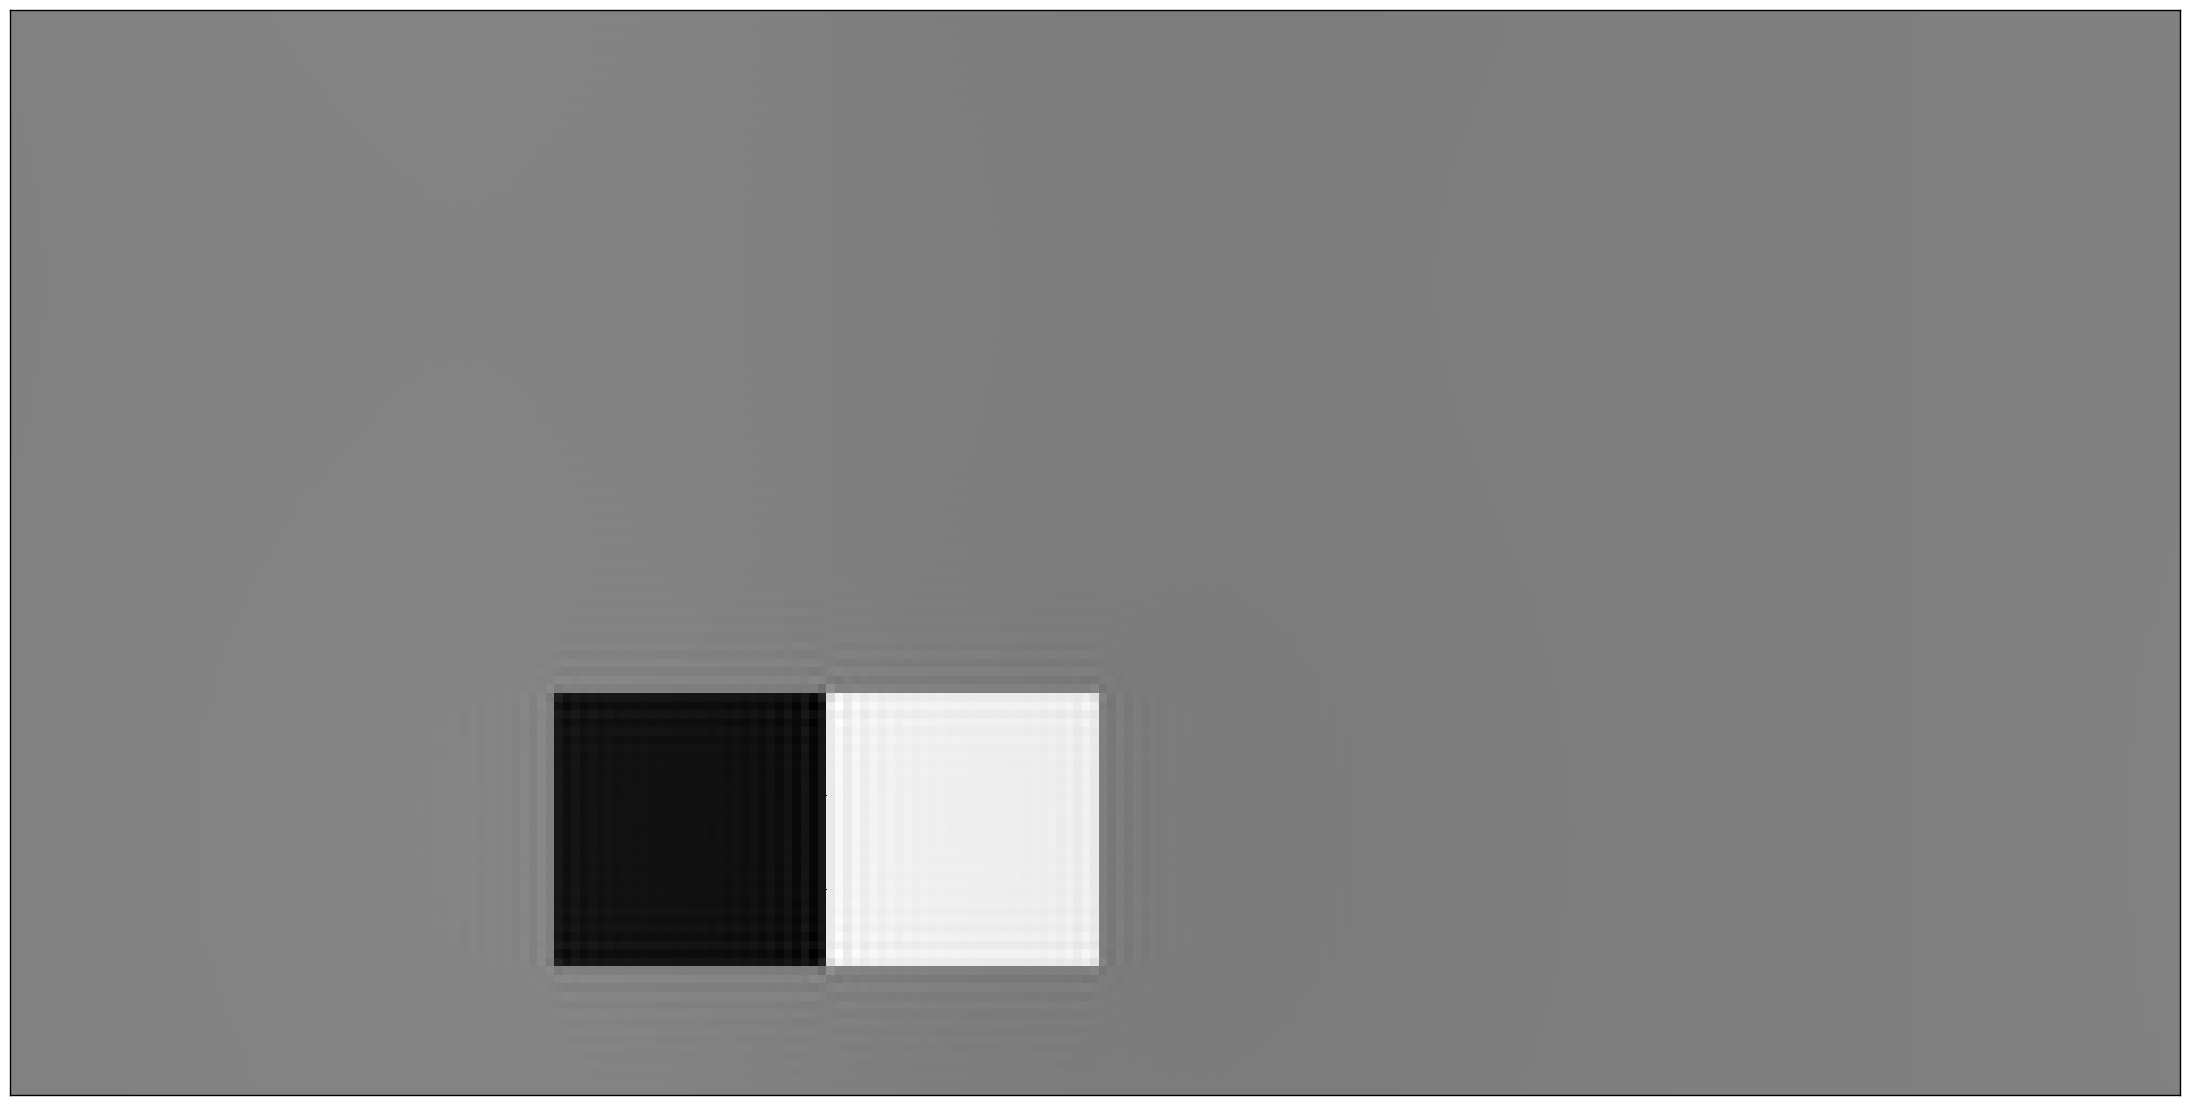

In [32]:
print(im.pe.N_X/8., im.pe.N_Y/4.)
_ = im.imshow(np.roll(np.roll(image, np.int(im.pe.N_X/8.), axis=0), np.int(im.pe.N_X/4.), axis=1))

remember **axis conventions** are: x going down, y going right with the origin on top

translating the image down

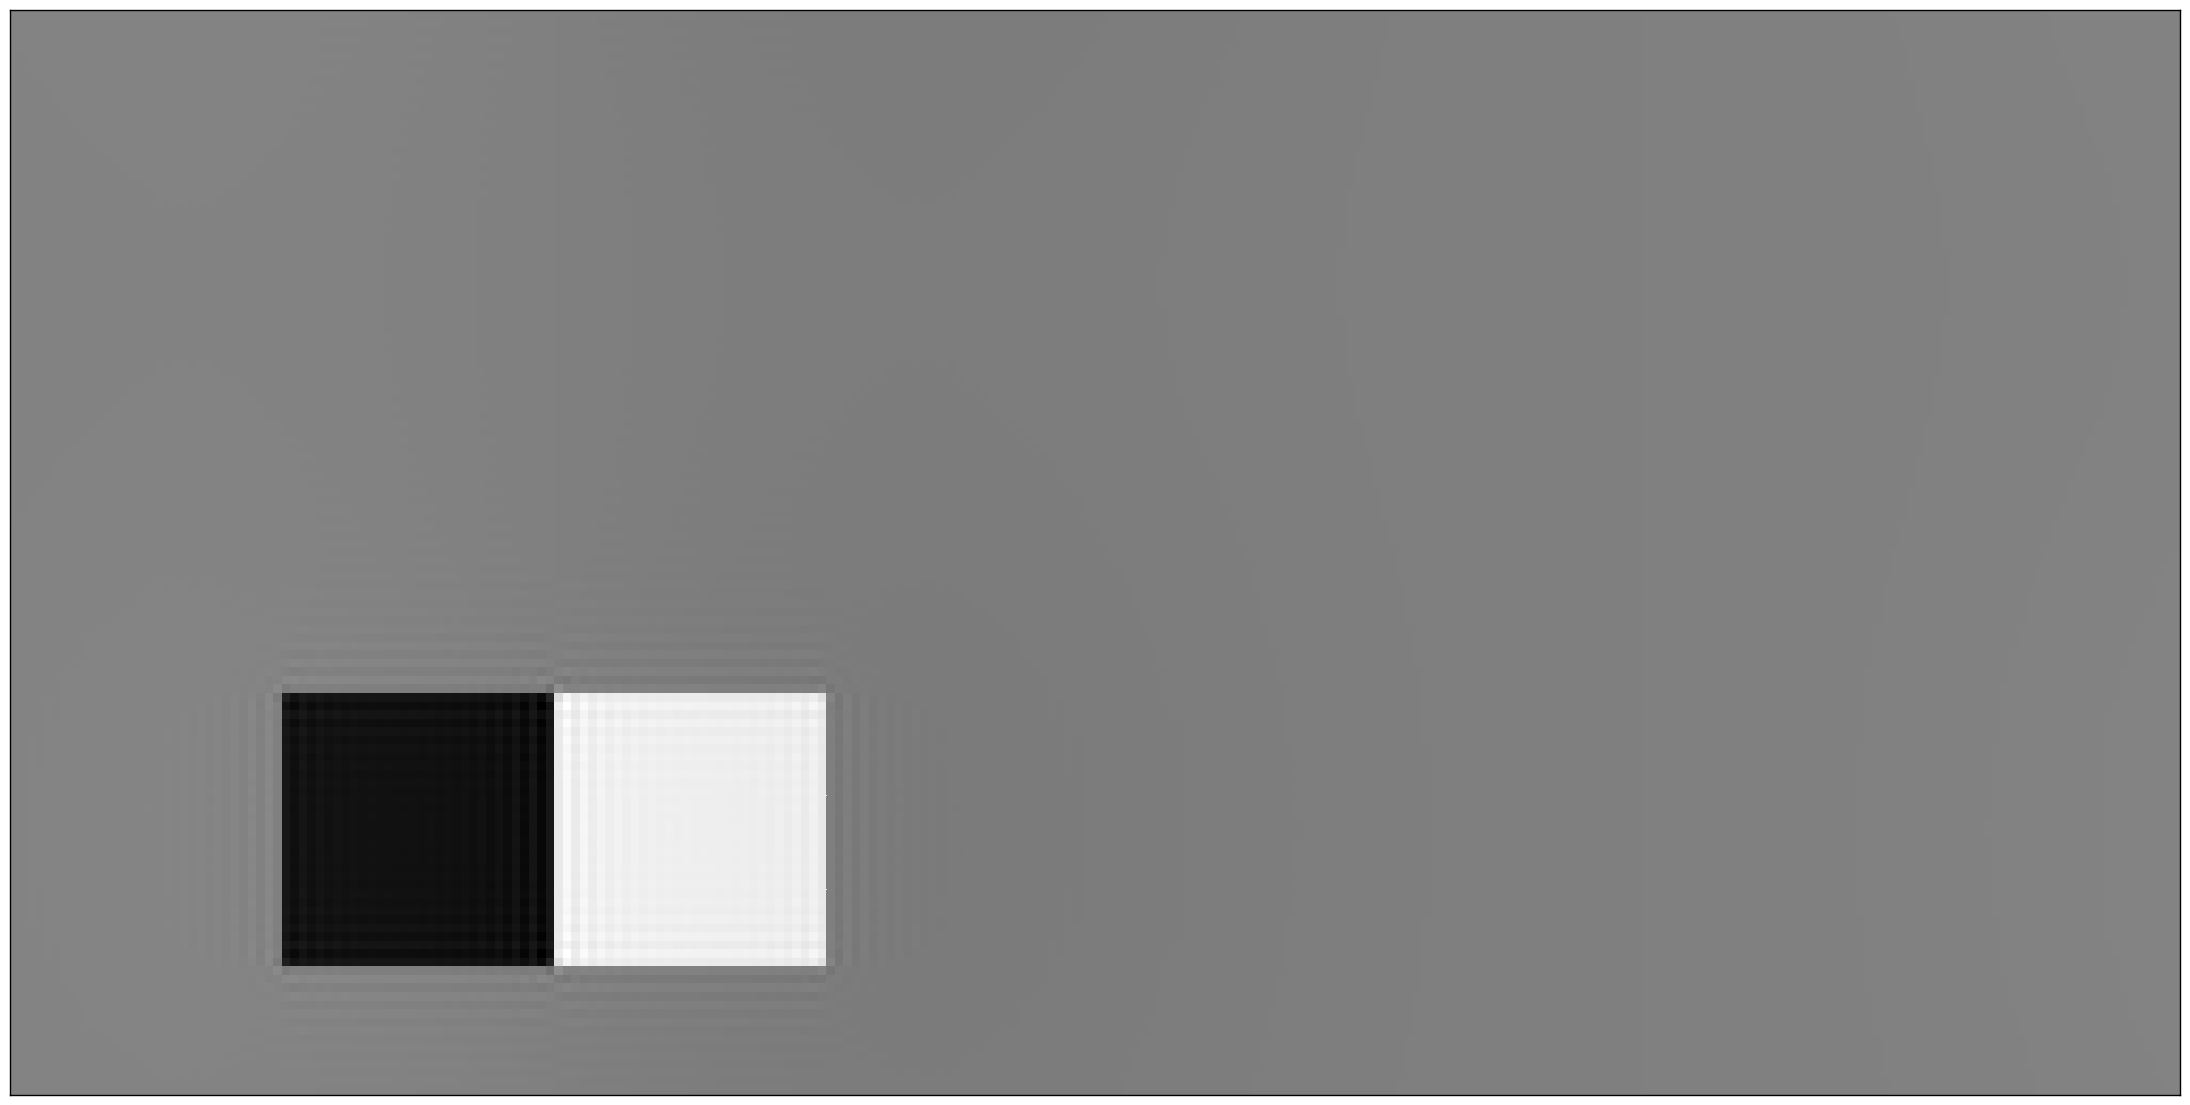

In [33]:
_ = im.imshow(im.translate(image, [im.pe.N_X/8., 0.]))

translating the image right

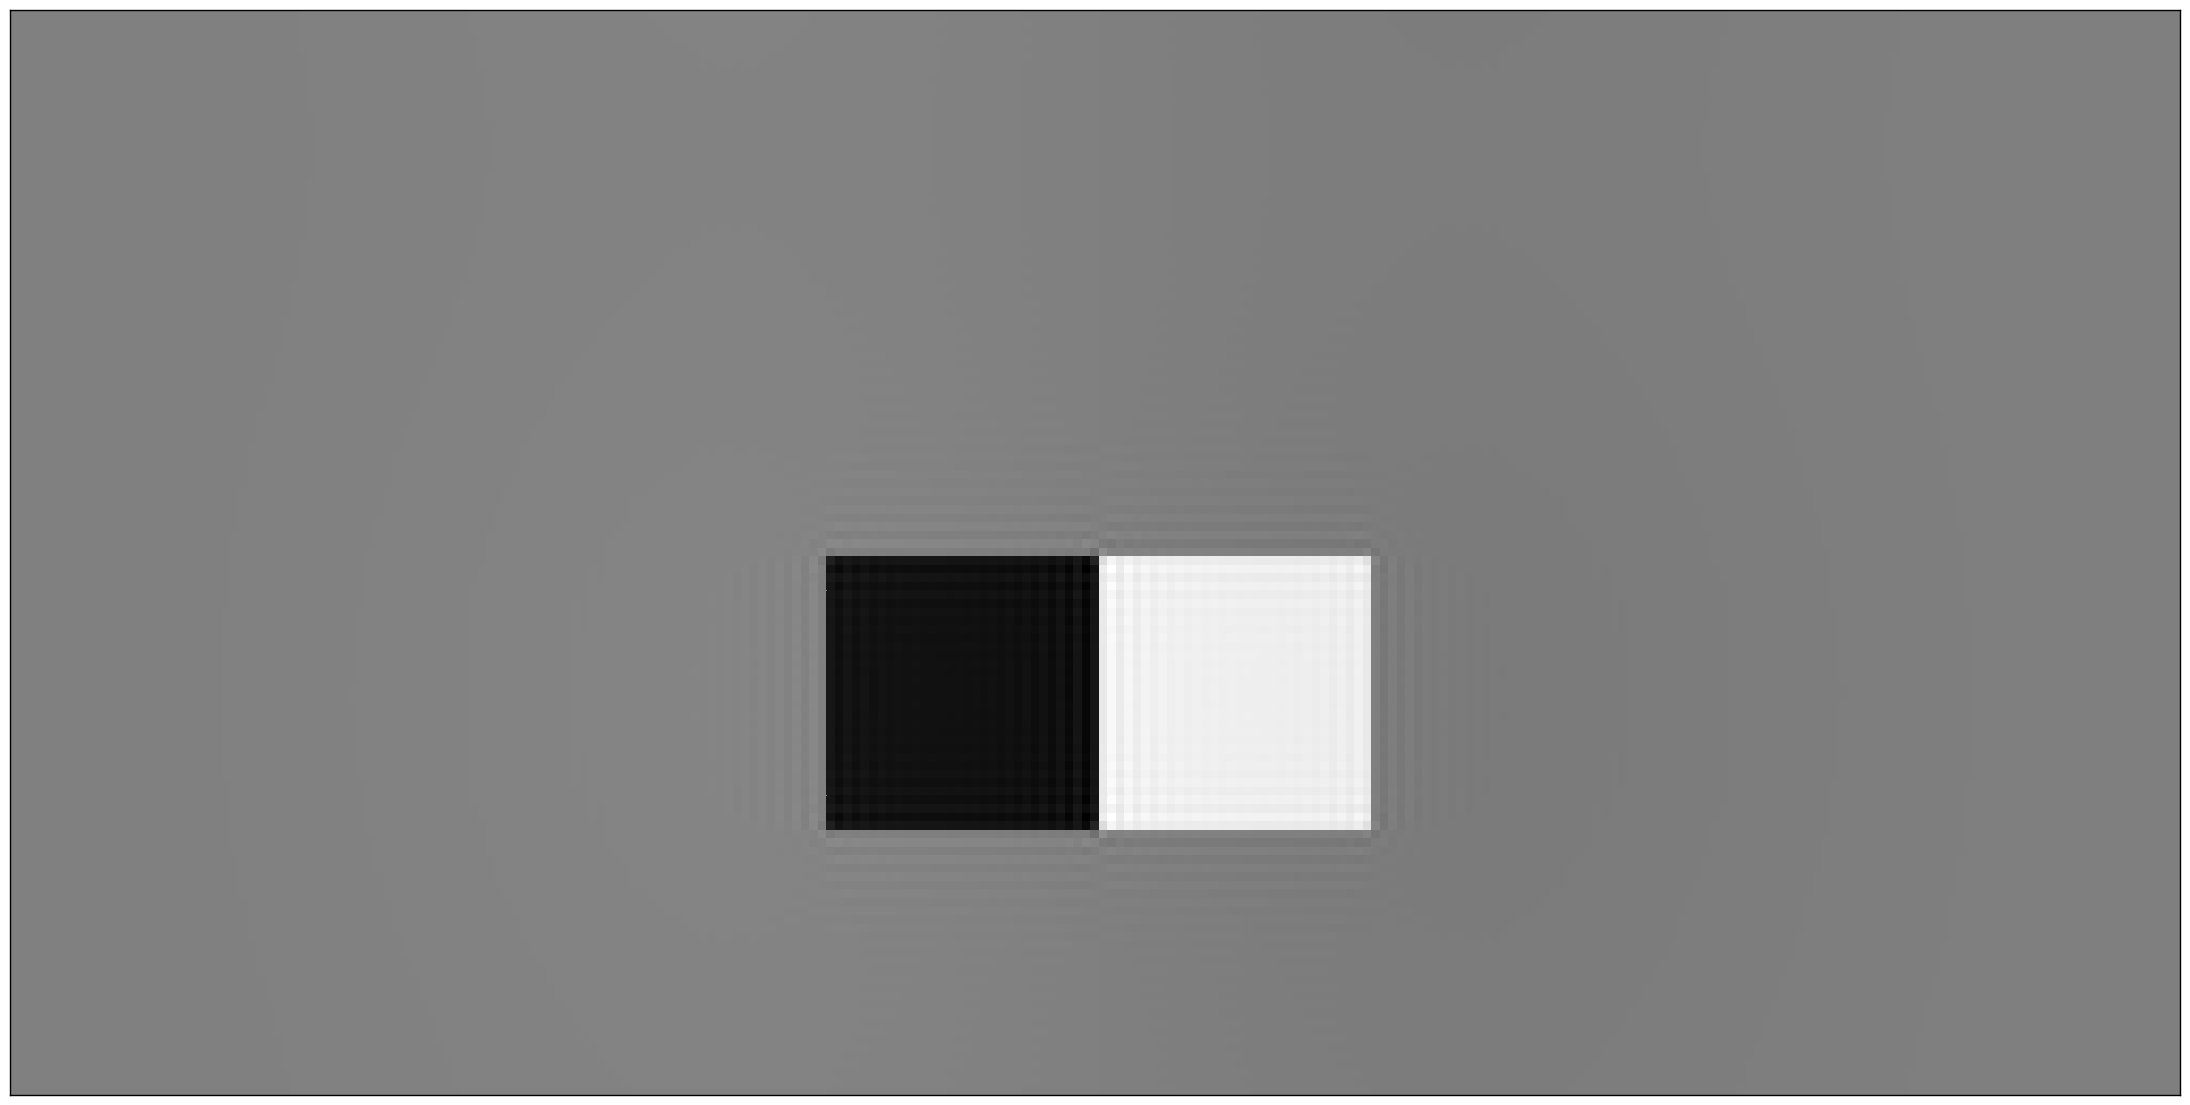

In [34]:
_ = im.imshow(im.translate(image, [0., im.pe.N_Y/4.]))

translating the image on both axis

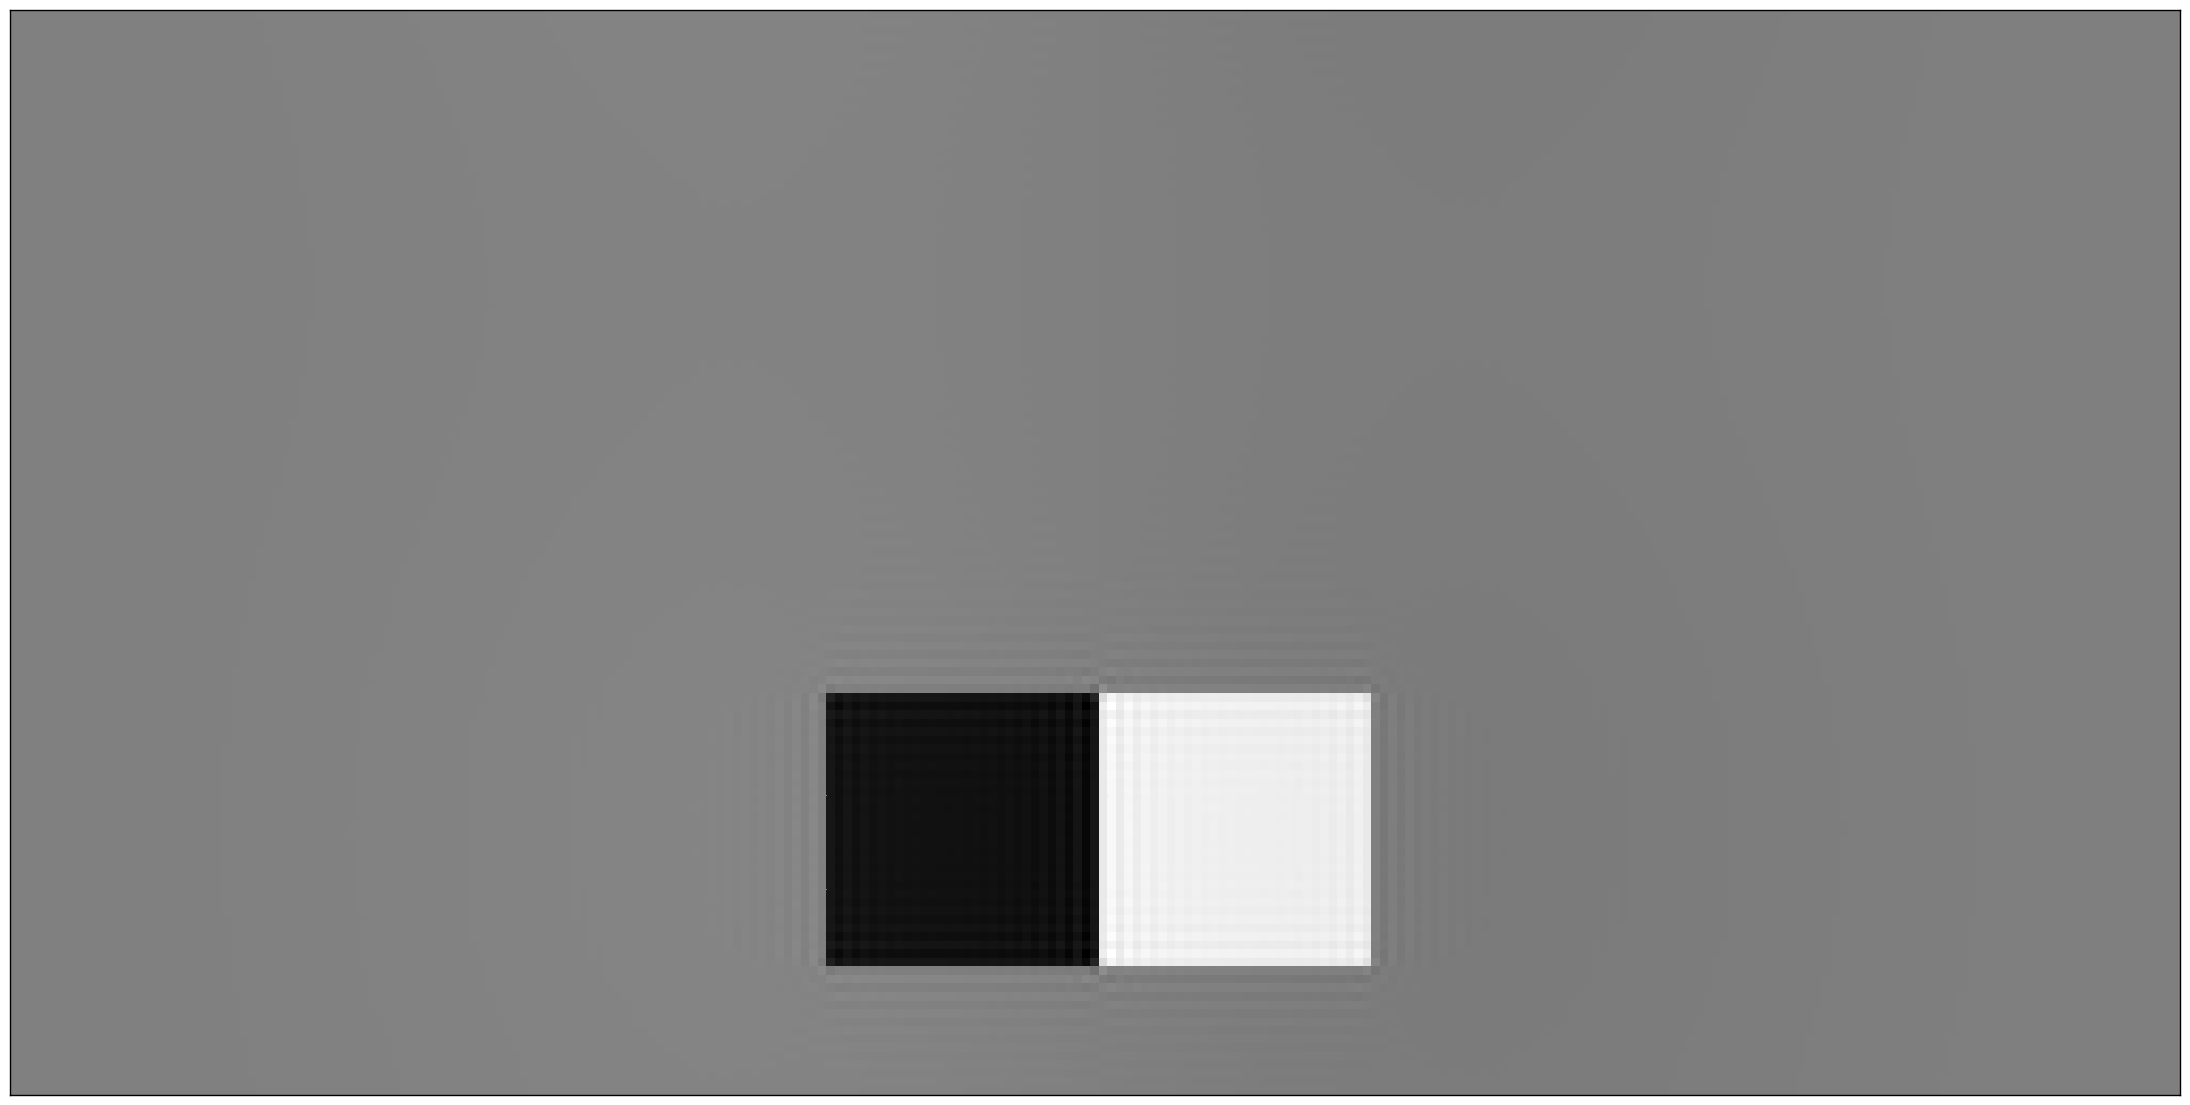

In [35]:
_ = im.imshow(im.translate(image, [im.pe.N_X/8., im.pe.N_Y/4.]))

translating the image over the torus

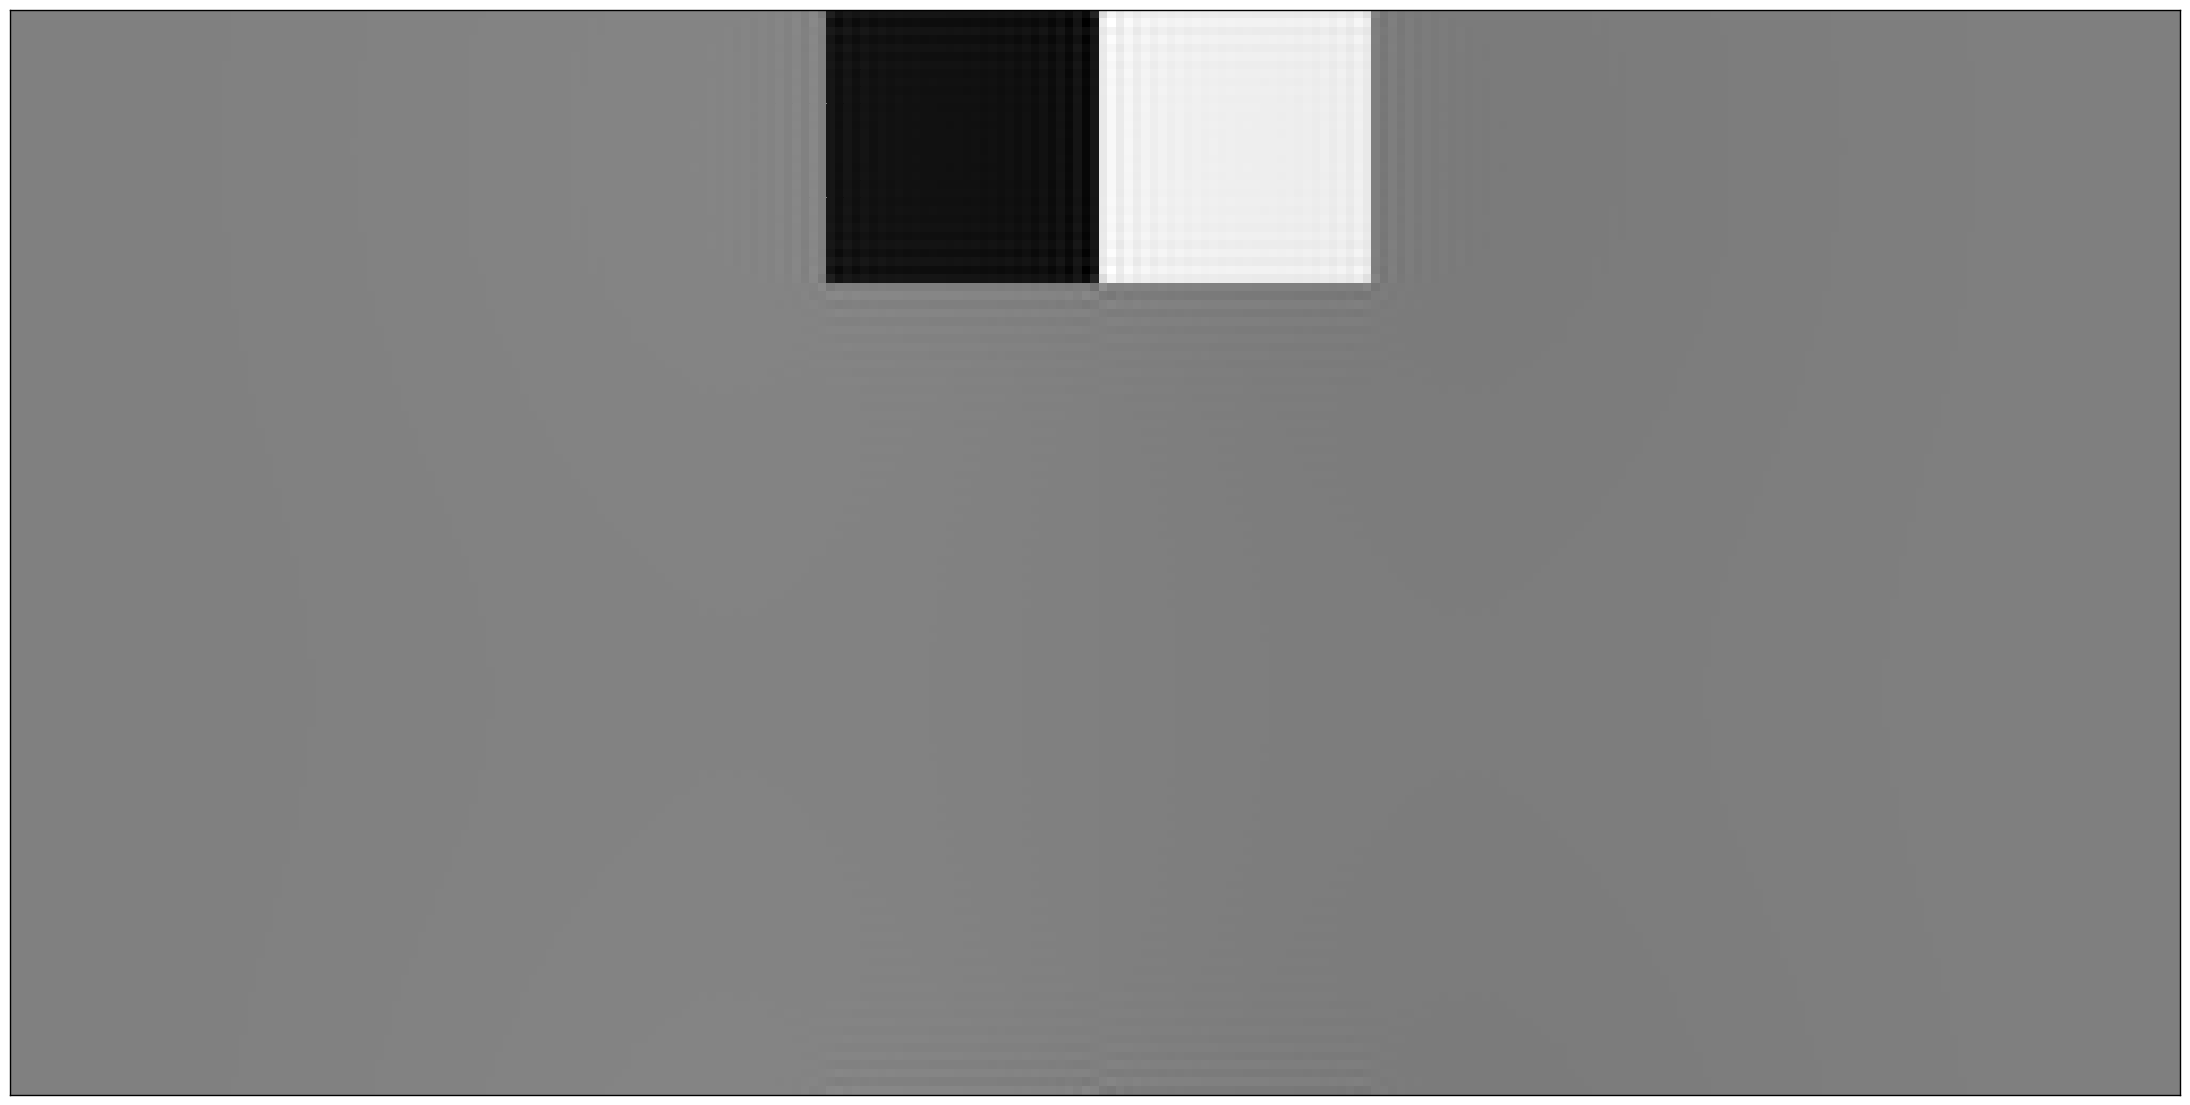

In [36]:
_ = im.imshow(im.translate(image, [im.pe.N_X/2., im.pe.N_Y/4.]))

[Back to top](#SLIP)

## some checks that should produce gray images (= null error)

null translation gives the same image

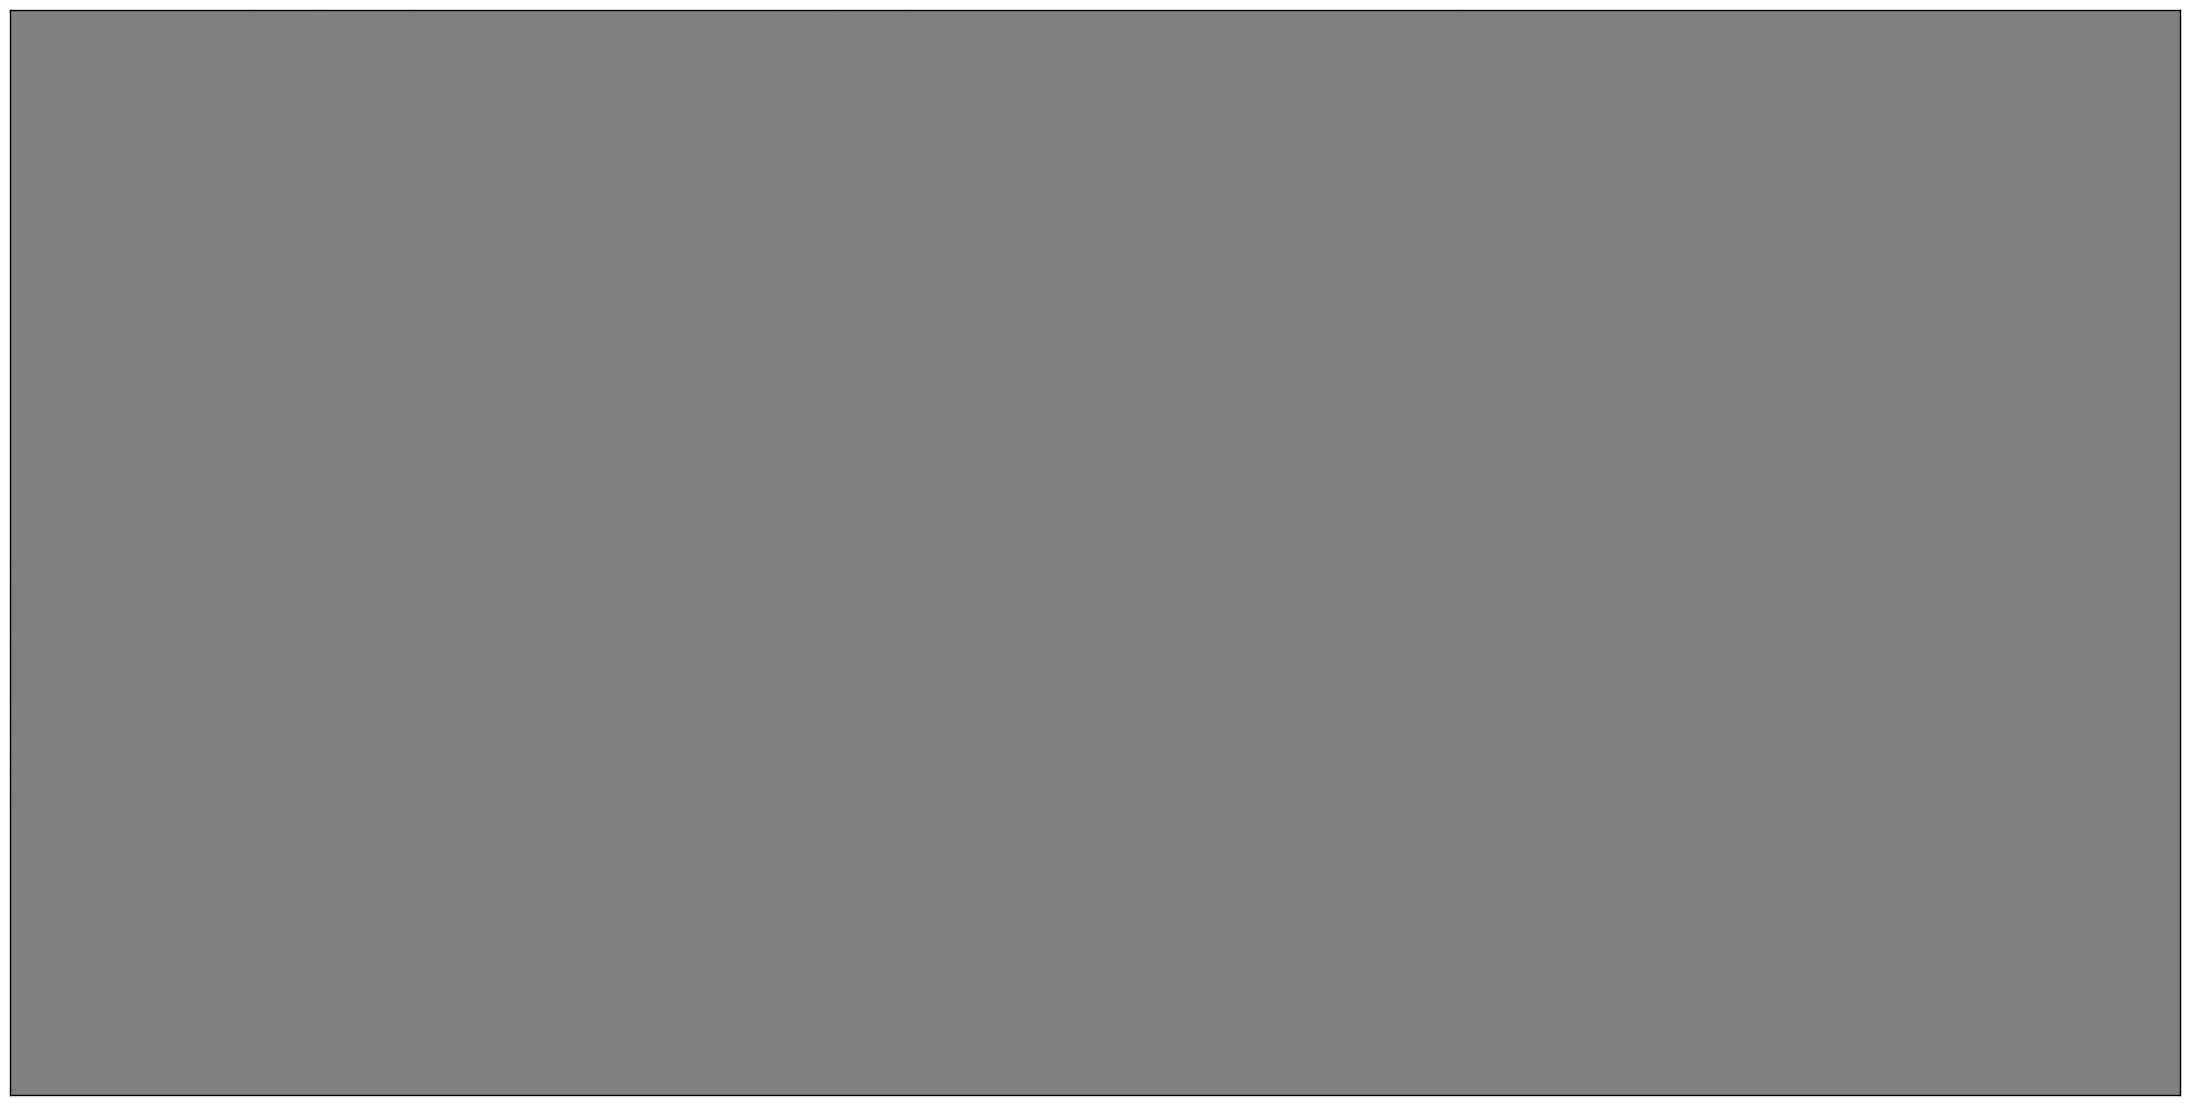

In [37]:
_ = im.imshow(image - im.translate(image, [0., 0.]), norm=False)

the lg.translate function is invertible

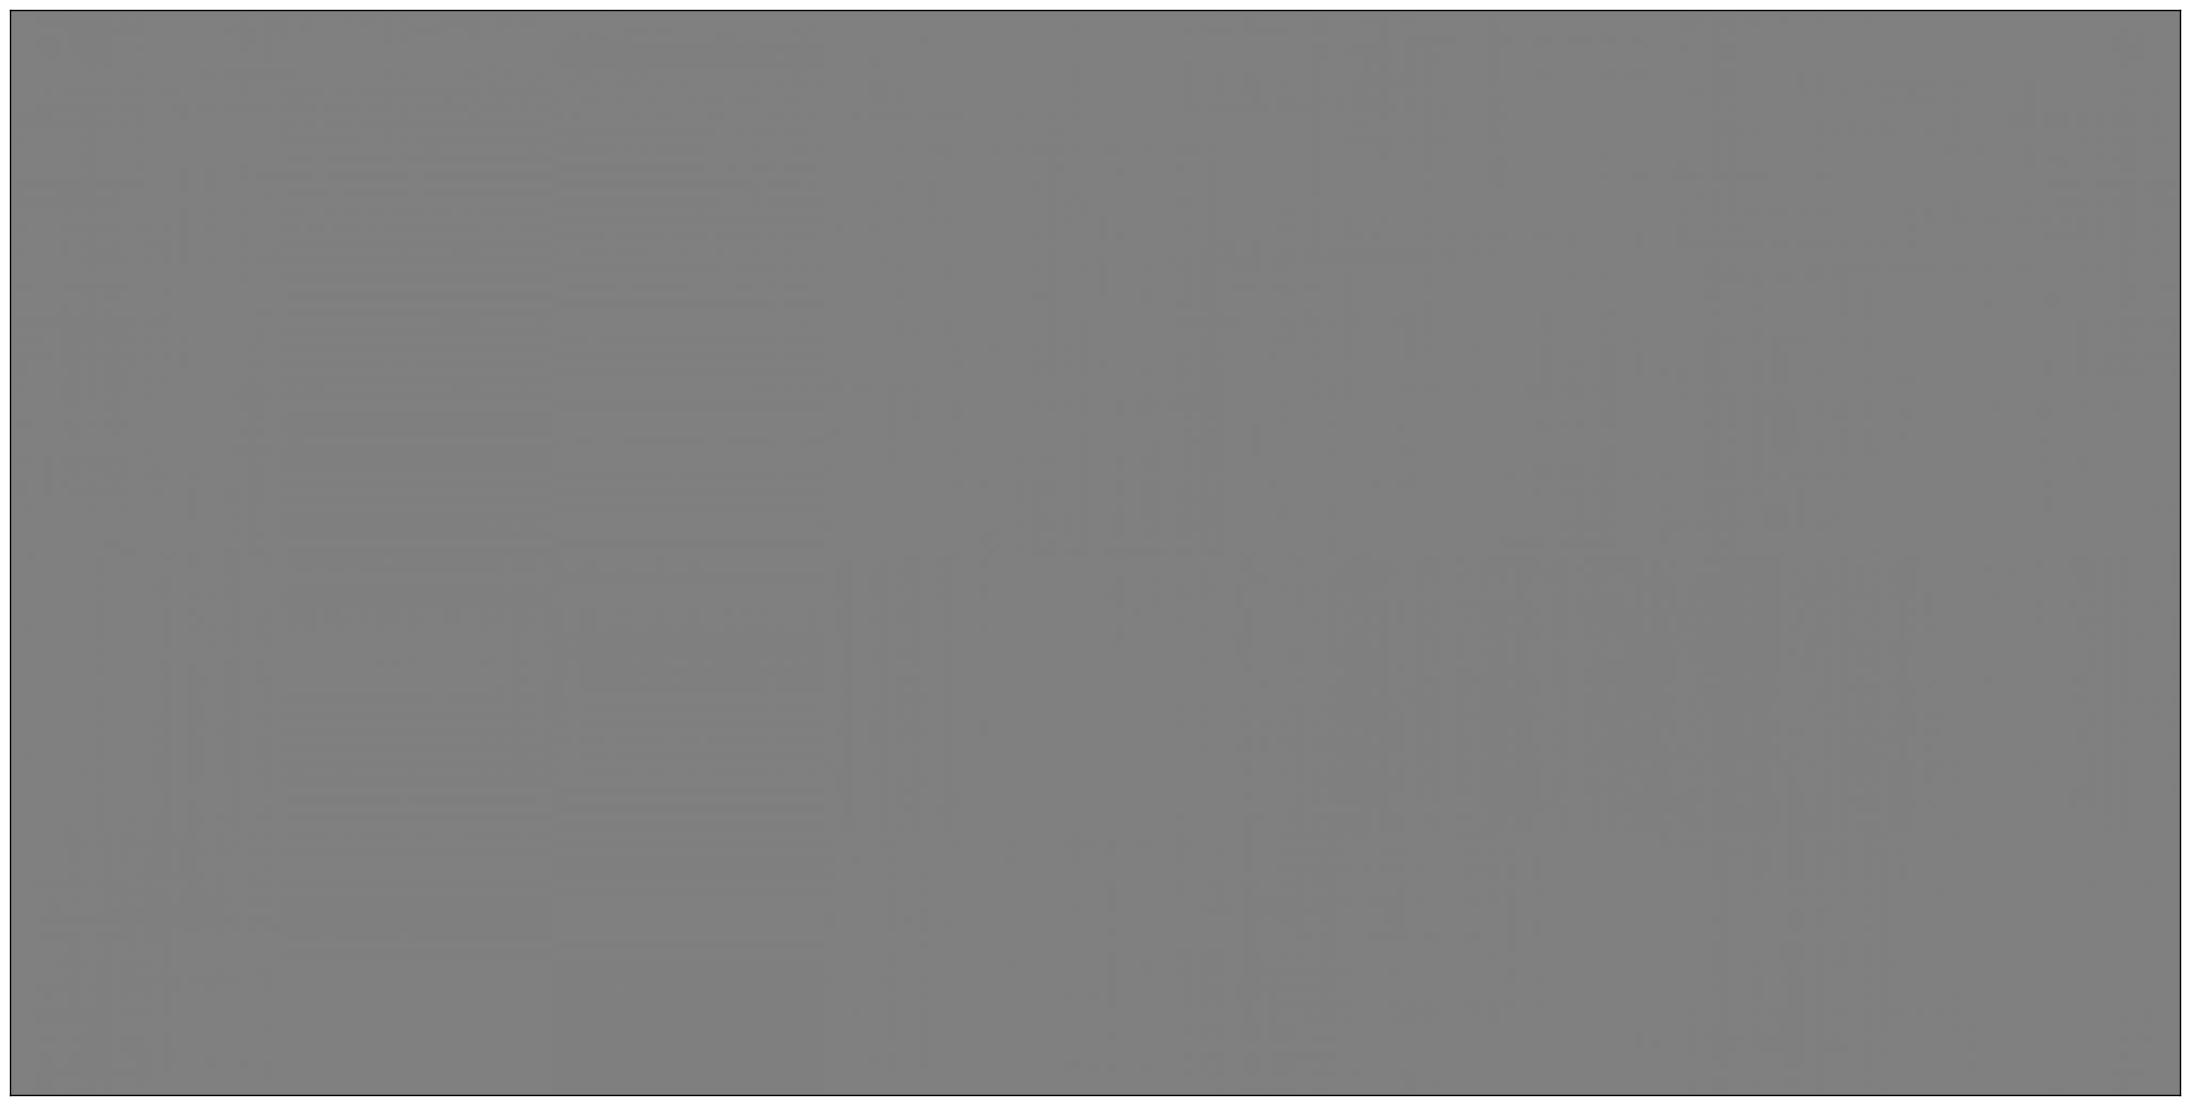

In [38]:
_ = im.imshow(image - im.translate(im.translate(image, [1.64, -2.233]), [-1.64, 2.233]), norm=False)

also true for bigger translations  (we separate integer part from fractional part in the translation)

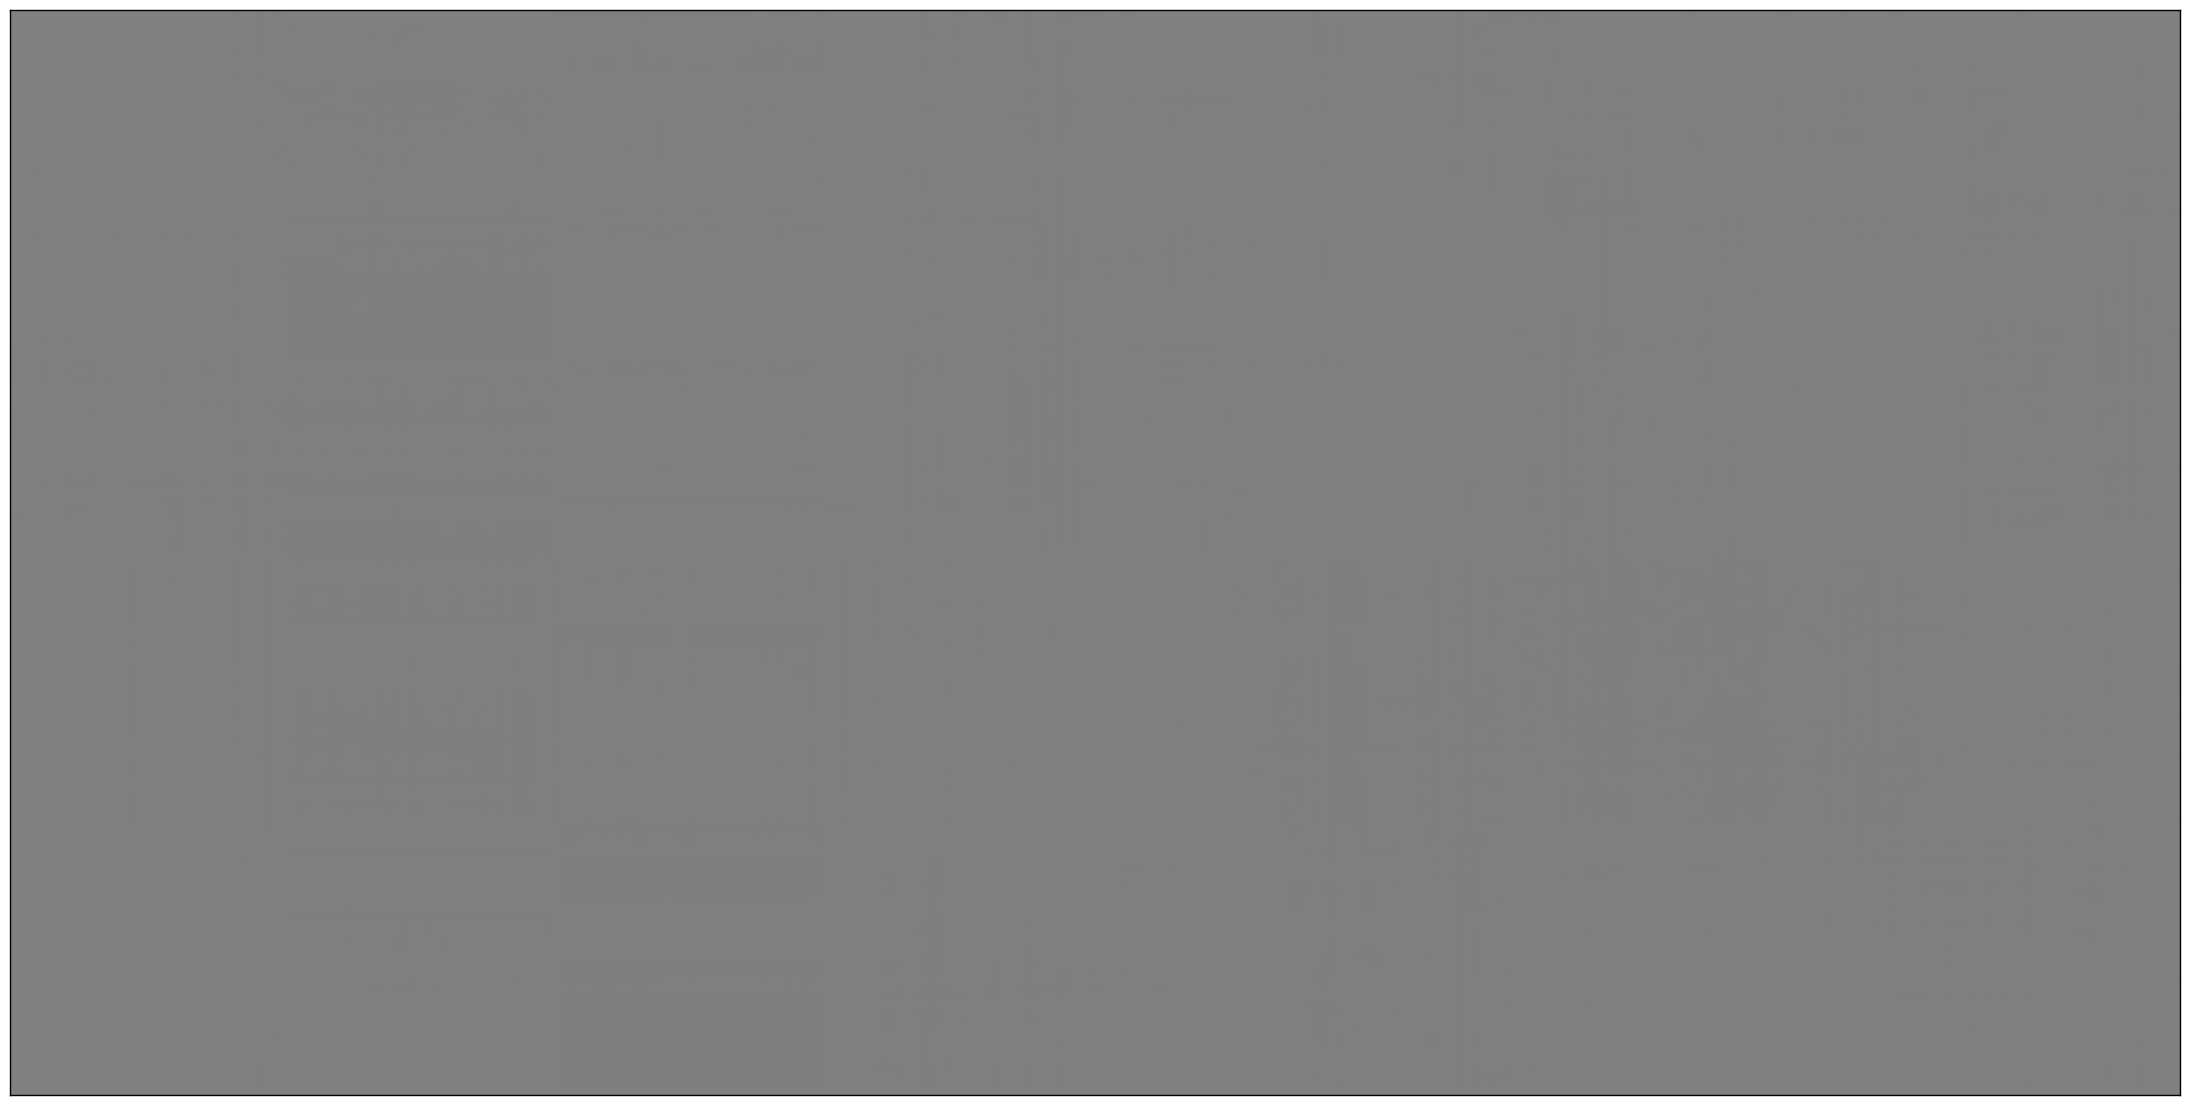

In [39]:
_ = im.imshow(image - im.translate(im.translate(image, [182.64, -286.233]), [-182.64, 286.233], preshift=True), norm=False)

but not always true when we don't separate

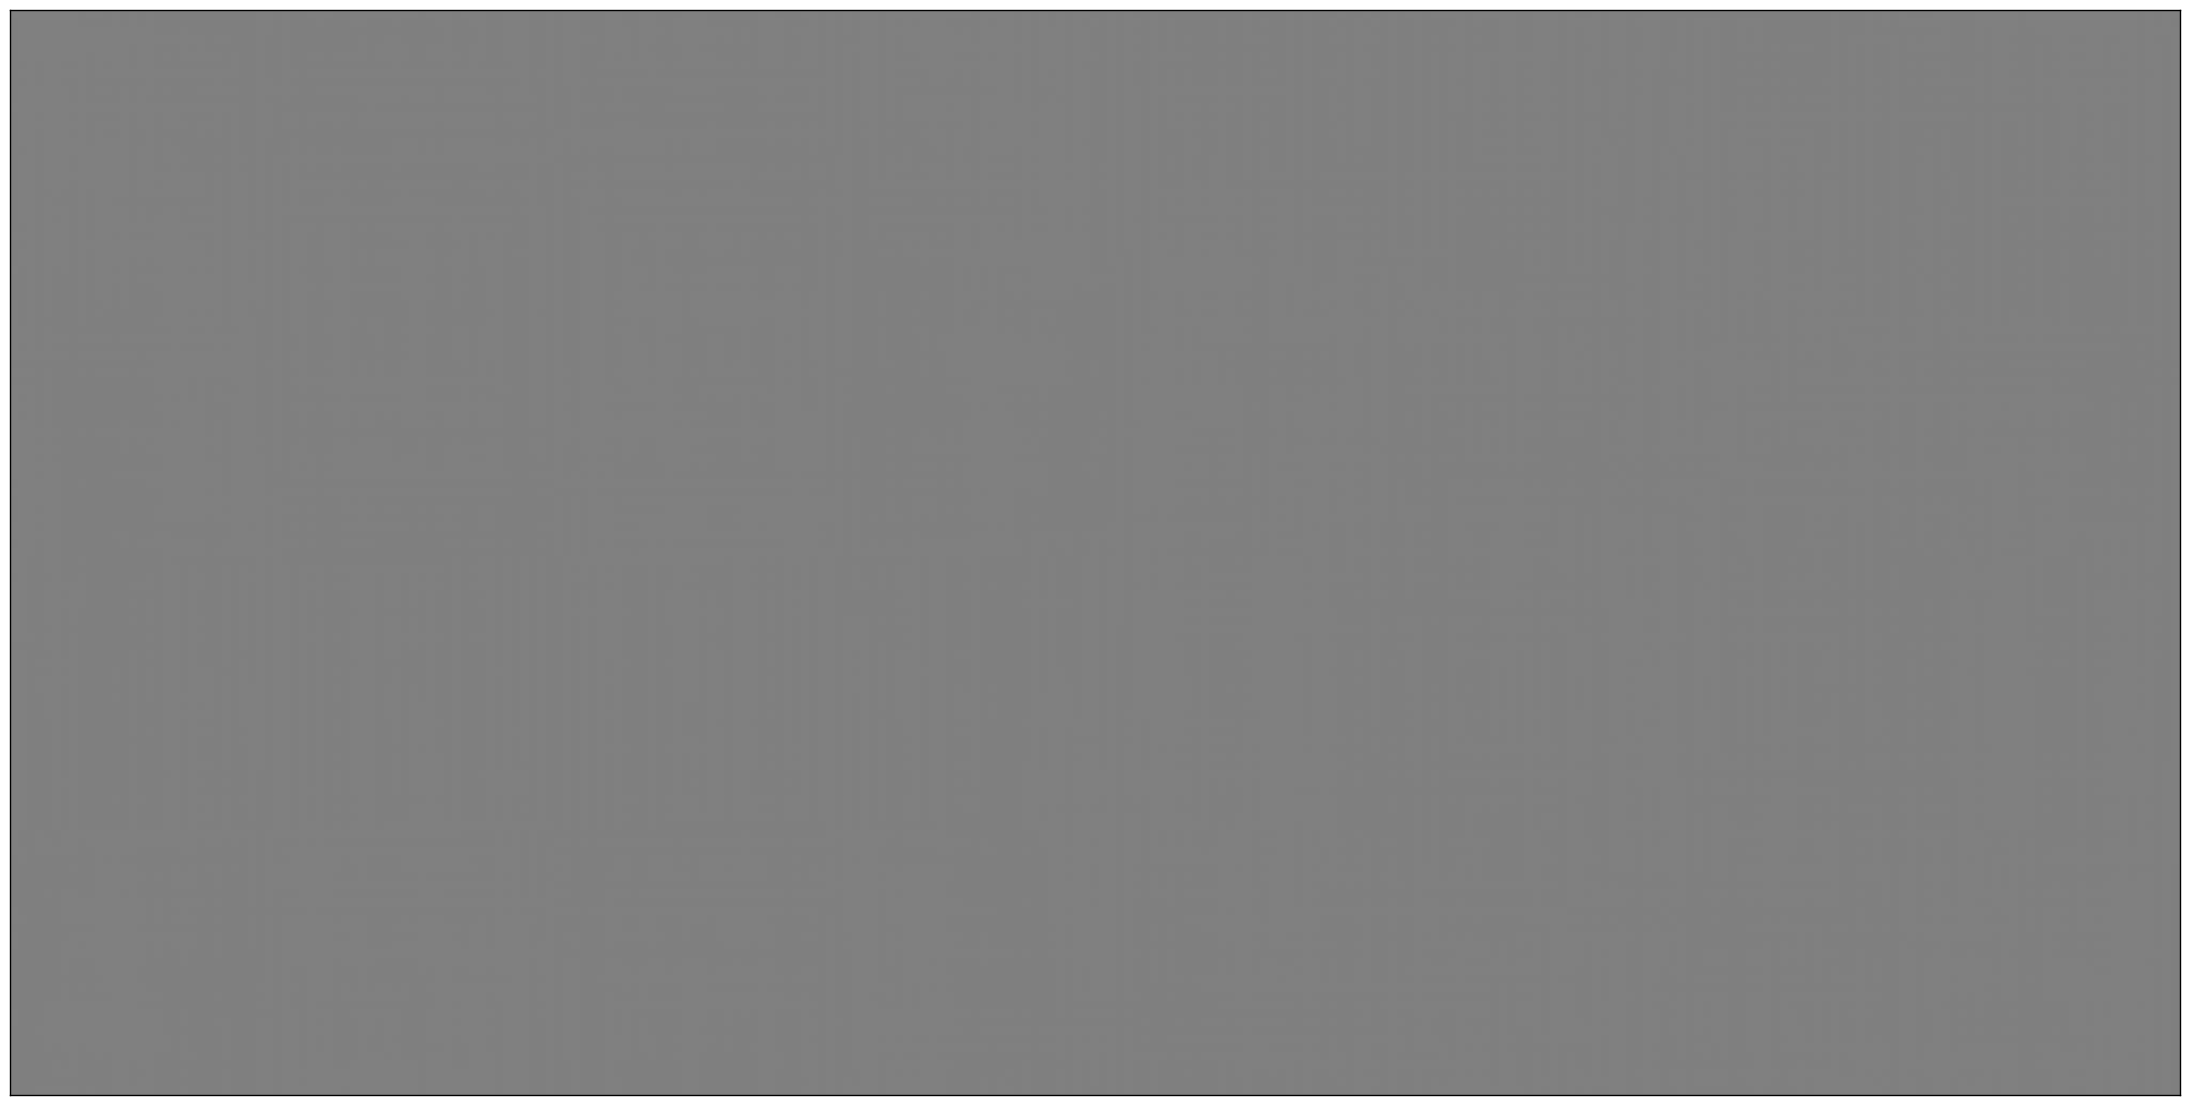

In [40]:
_ = im.imshow(image - im.translate(im.translate(image, [182.64, -286.233]), [-182.64, 286.233], preshift=False), norm=False)

the lg.translate function is periodic

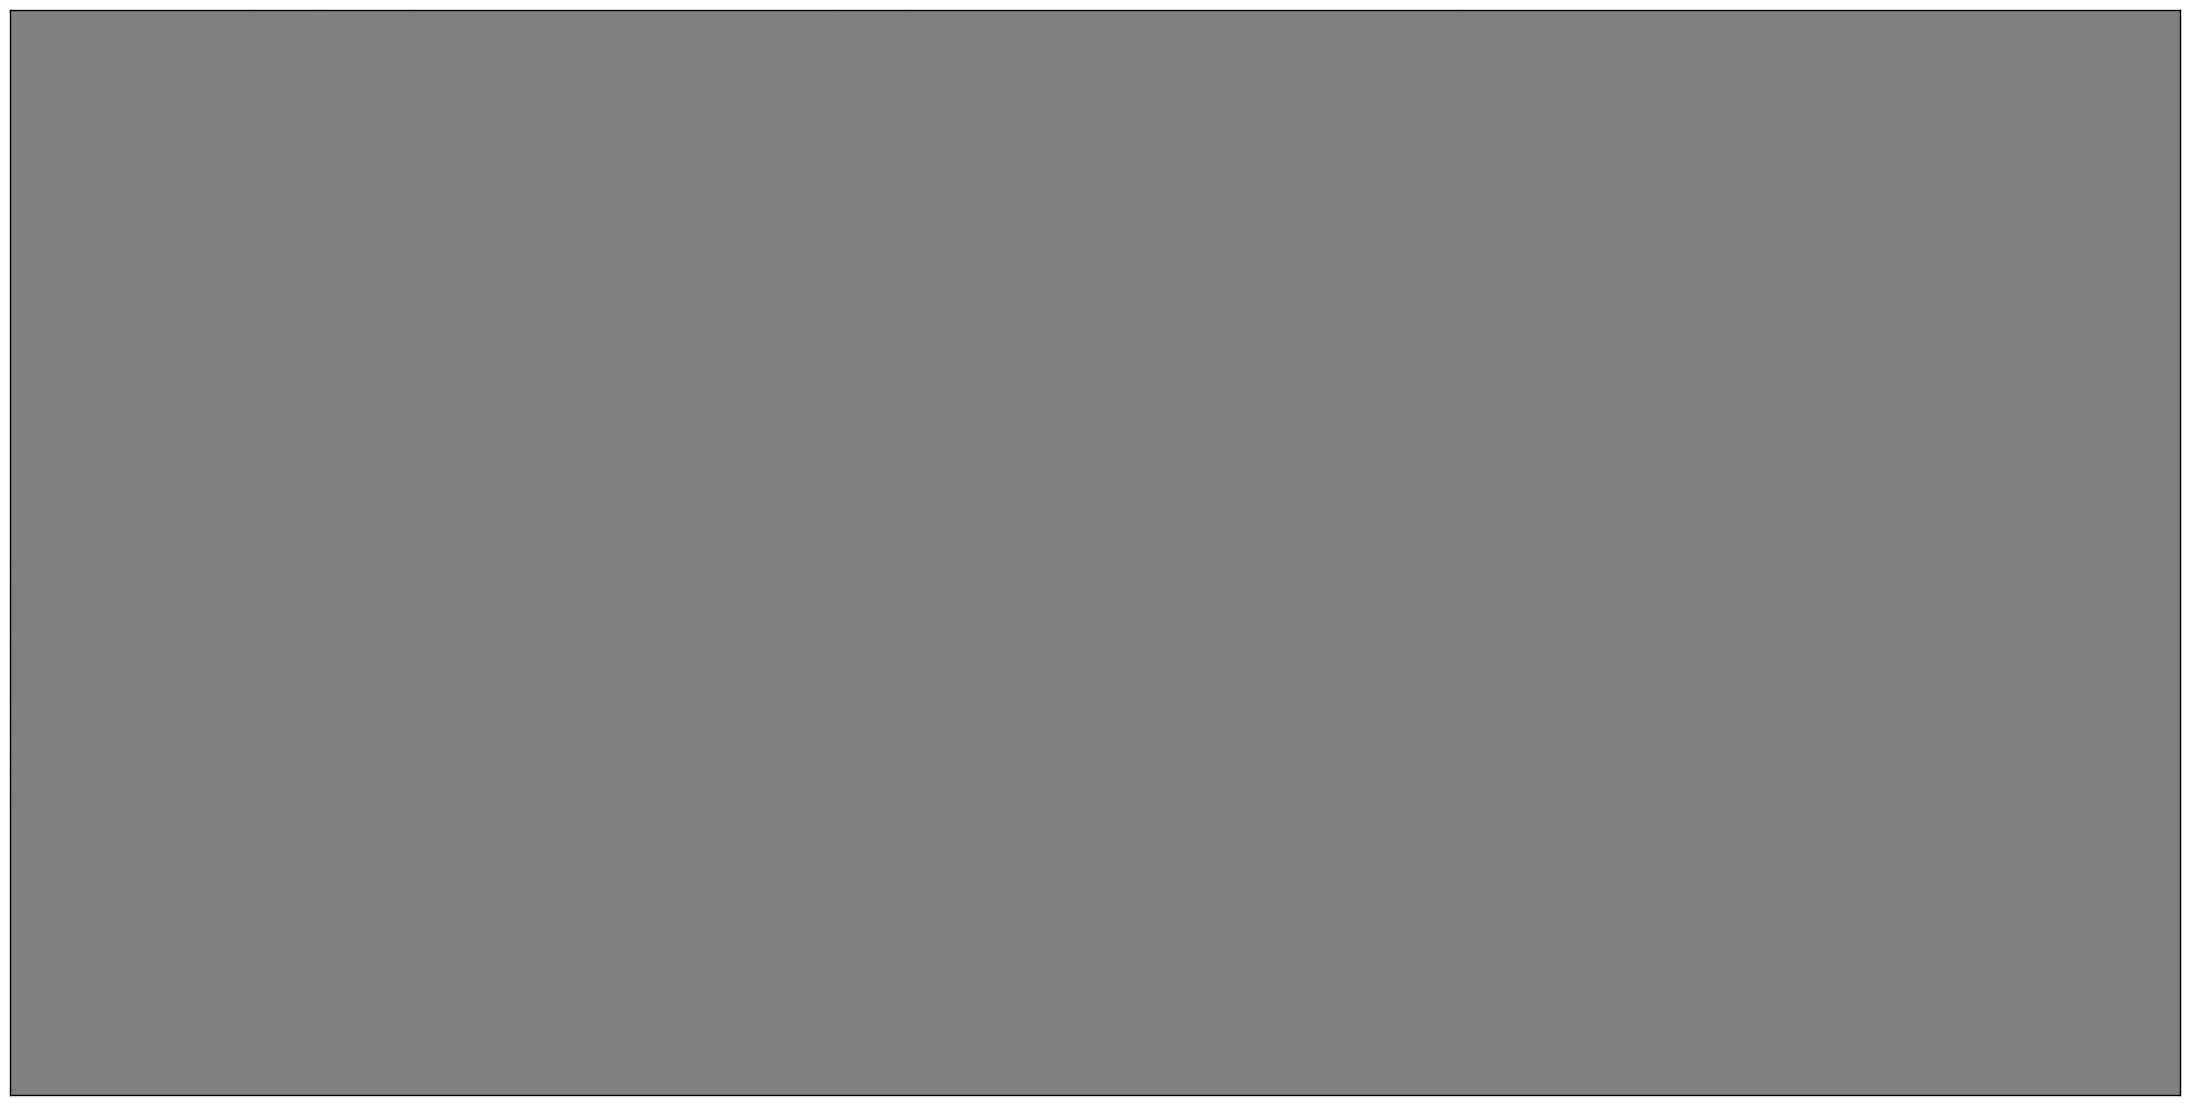

In [41]:
_ = im.imshow(image - im.translate(image, [-45*im.pe.N_X, 5*im.pe.N_Y]), norm=False)

lg.translate function is associative

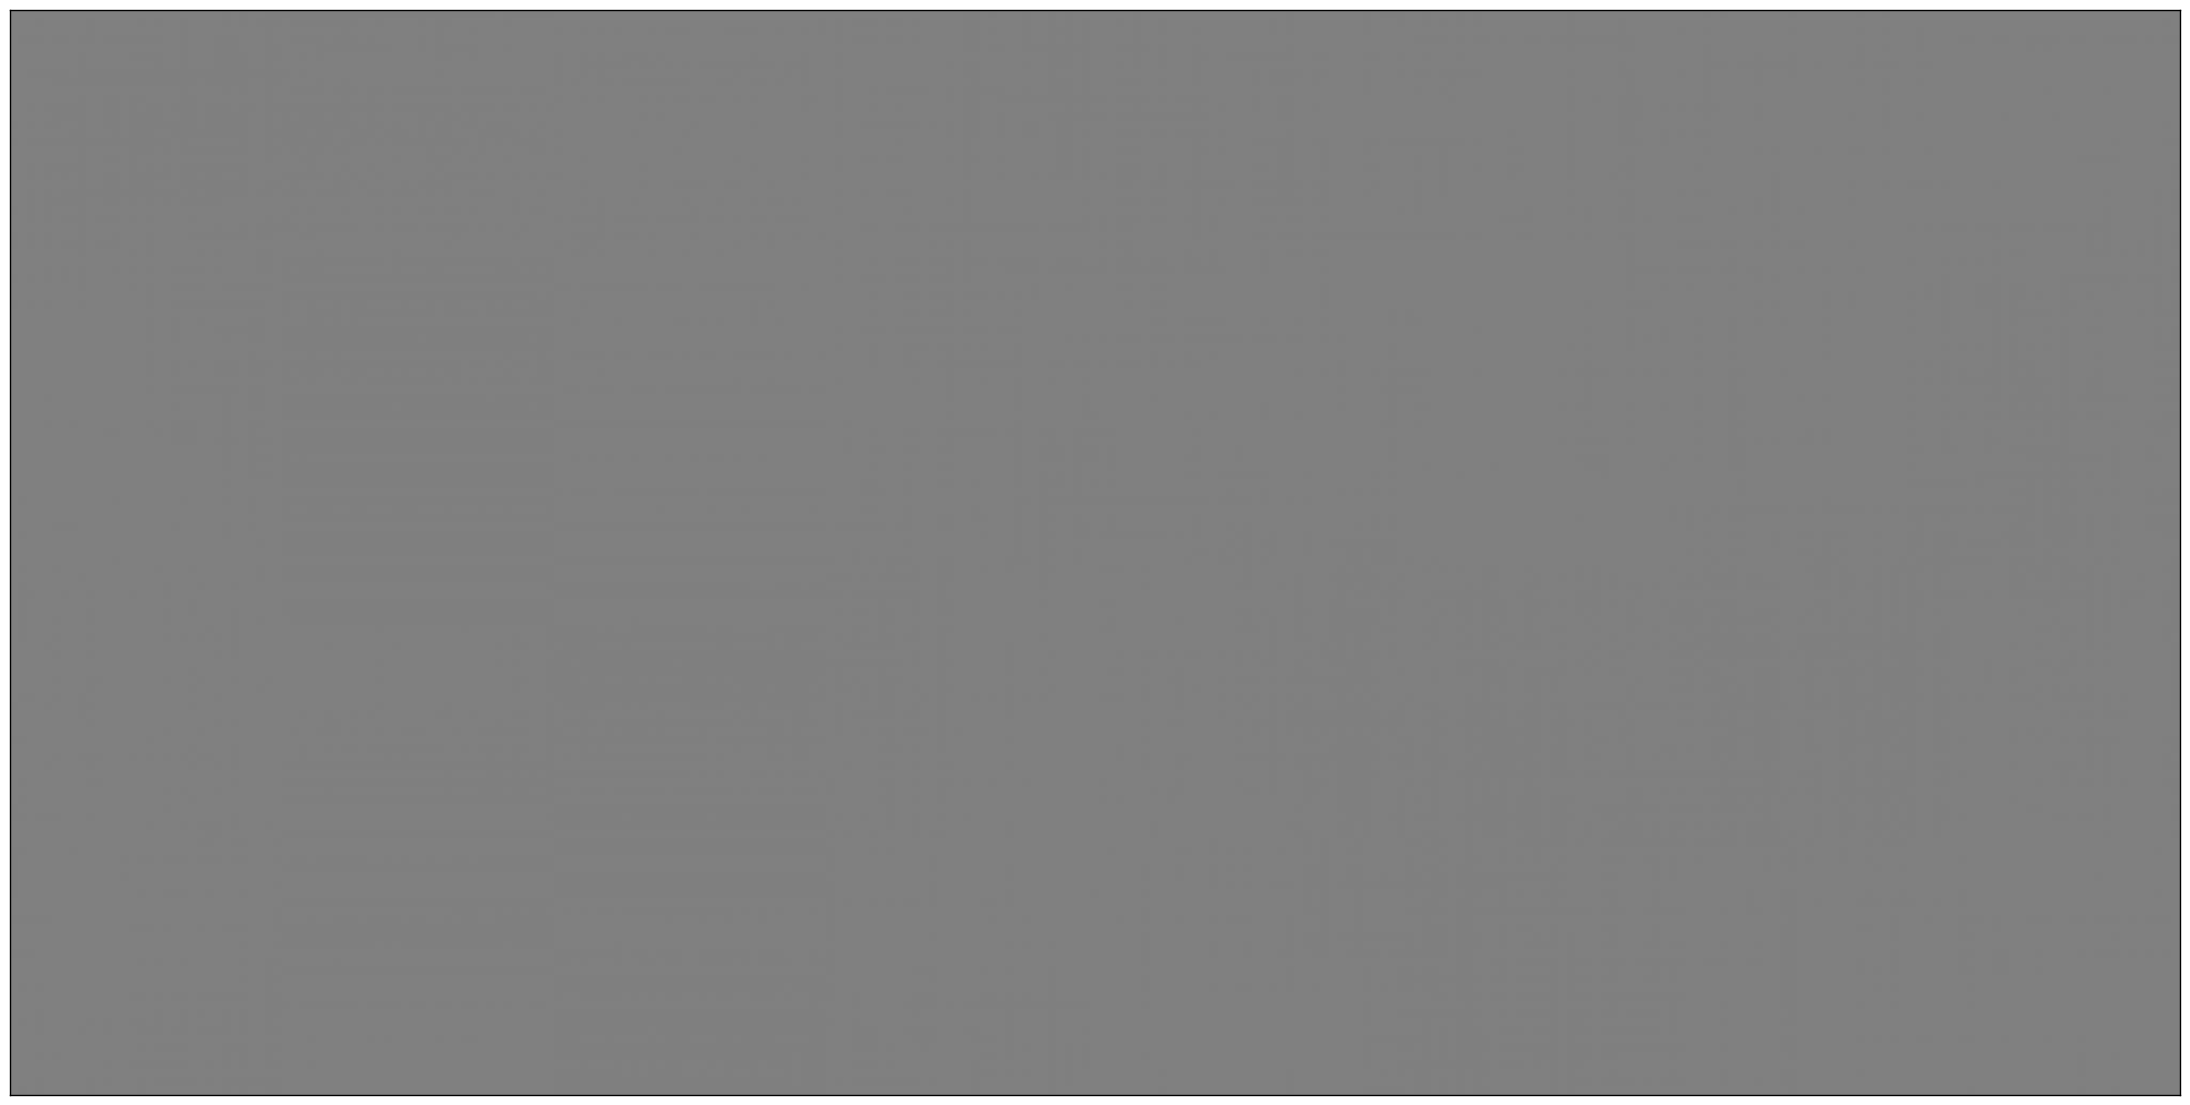

In [42]:
_ = im.imshow(im.translate(image, [1., .0]) - im.translate(im.translate(image, [.5, .0]), [.5, .0]), norm=False)

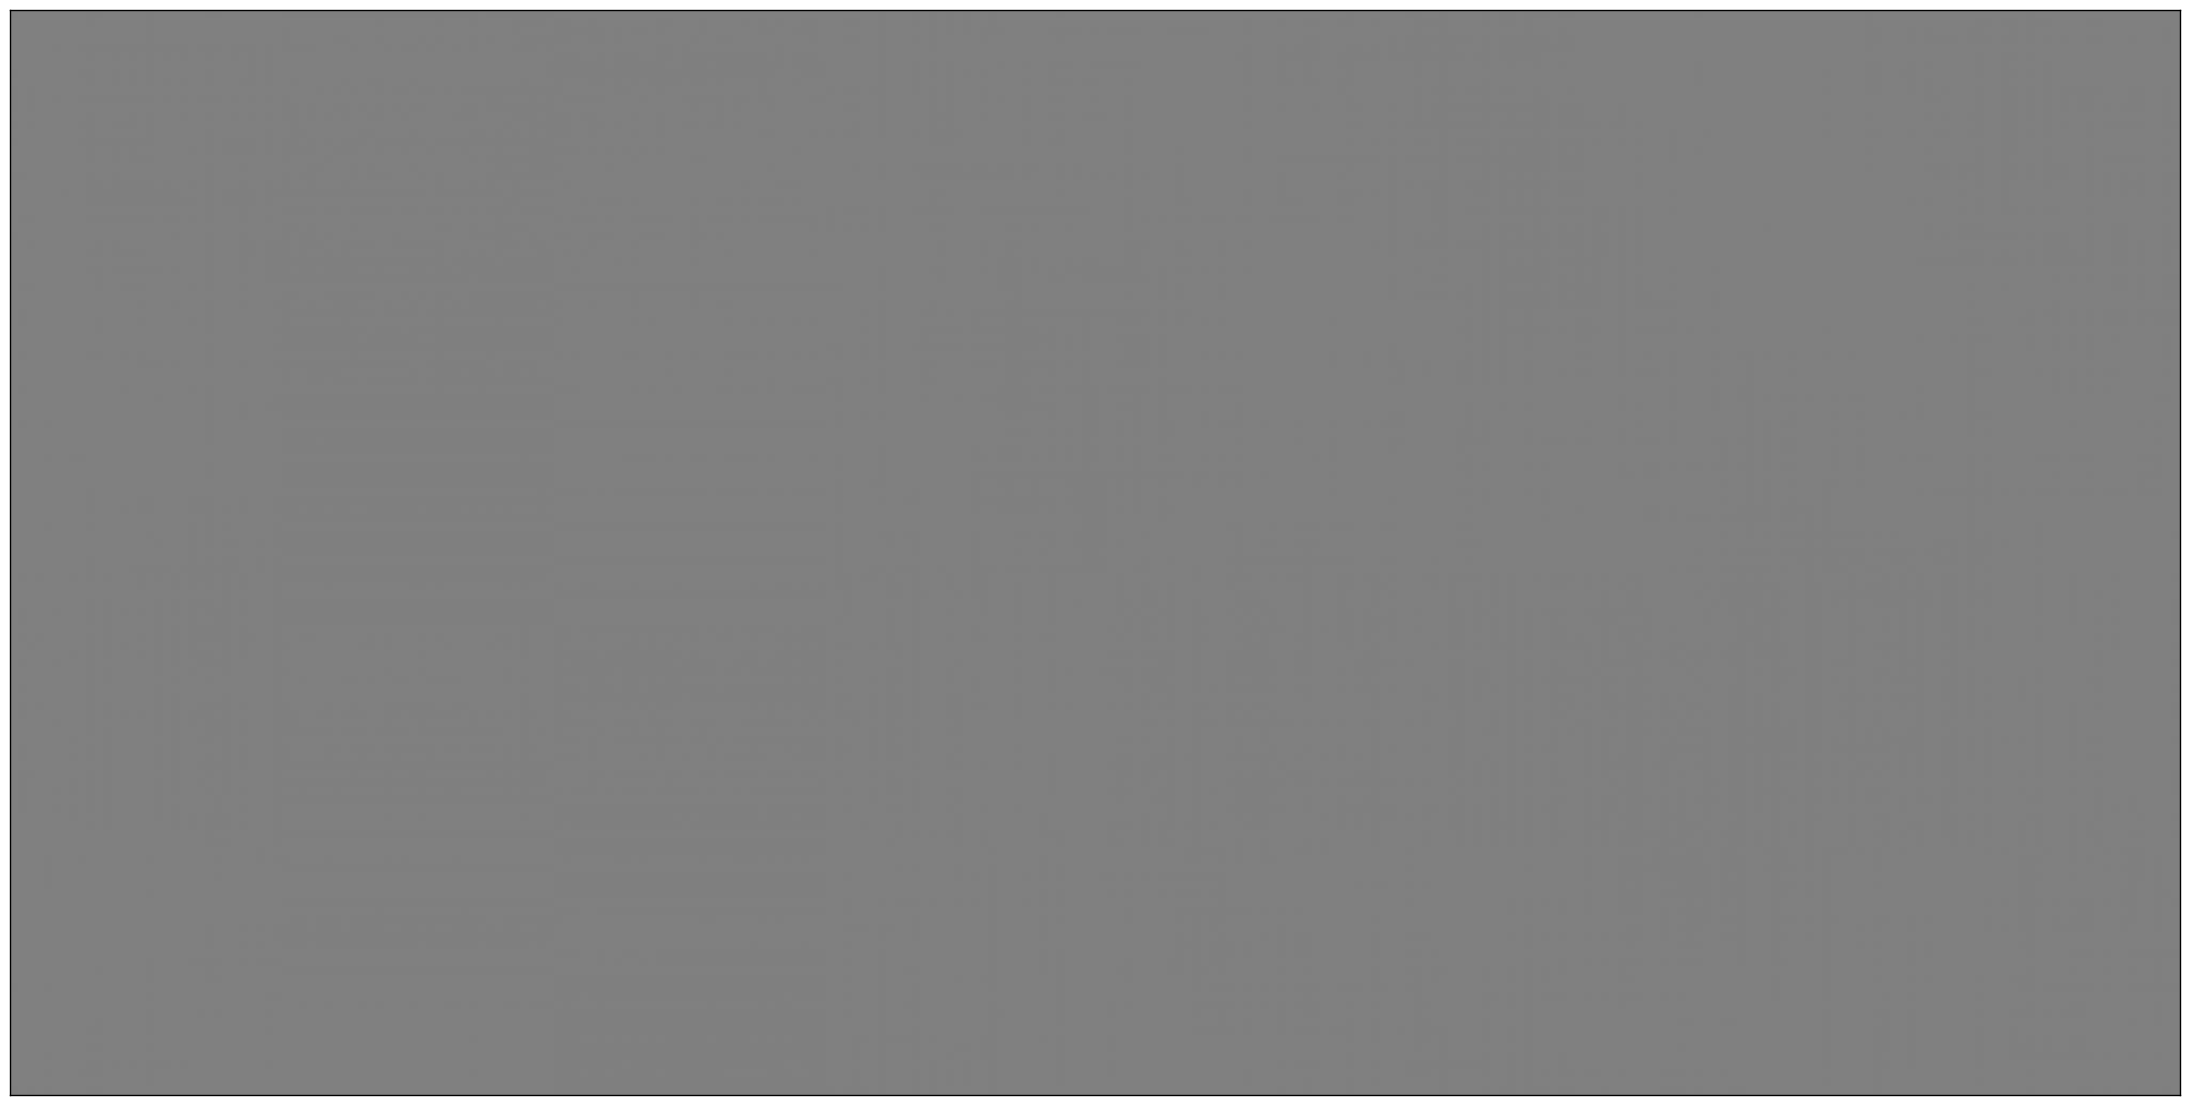

In [43]:
_ = im.imshow(im.translate(image, [2., .0]) - im.translate(im.translate(image, [1.5, -1.0]), [.5, 1.0]), norm=False)

## filtering

TODO

## whitening

TODO

Using image  F_N103058.jpg


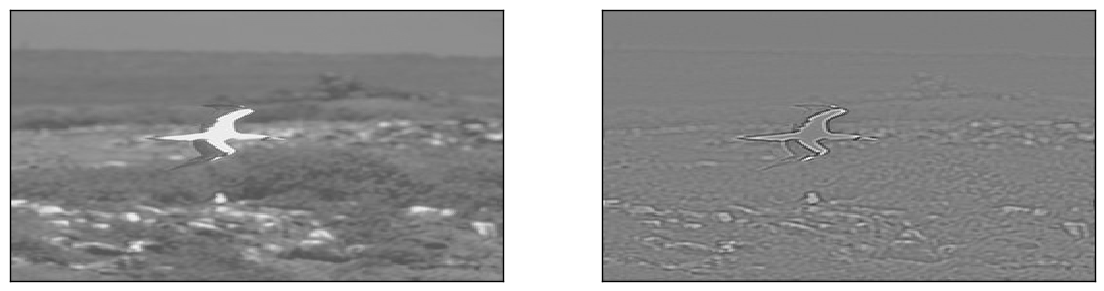

Using image  M_N816048.jpg


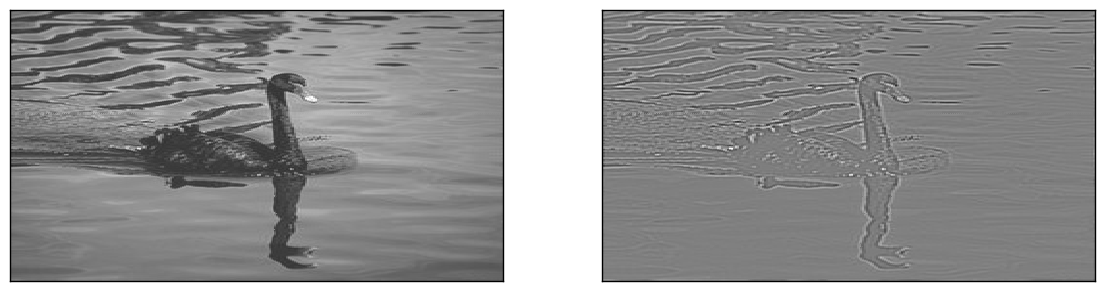

Using image  H_ani50.jpg


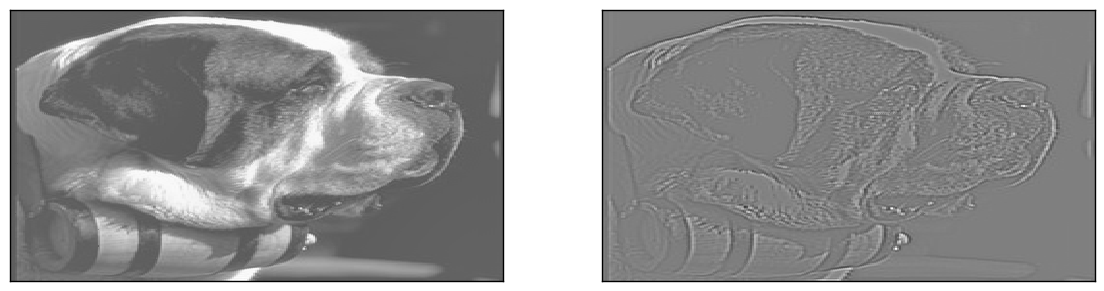

Using image  M_N100096.jpg


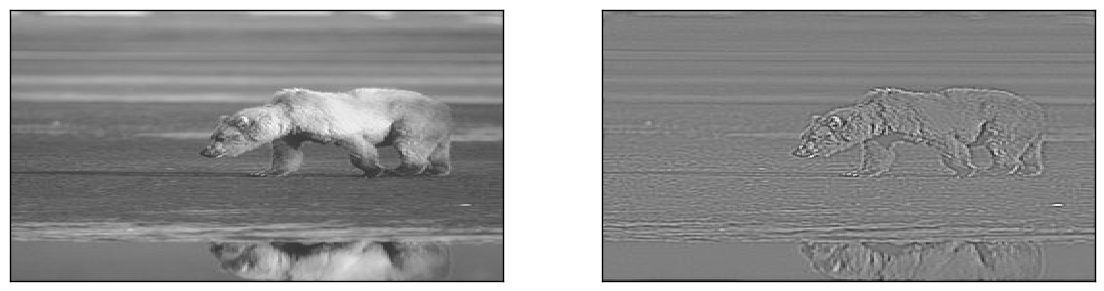

Using image  Bdn_for122.jpg


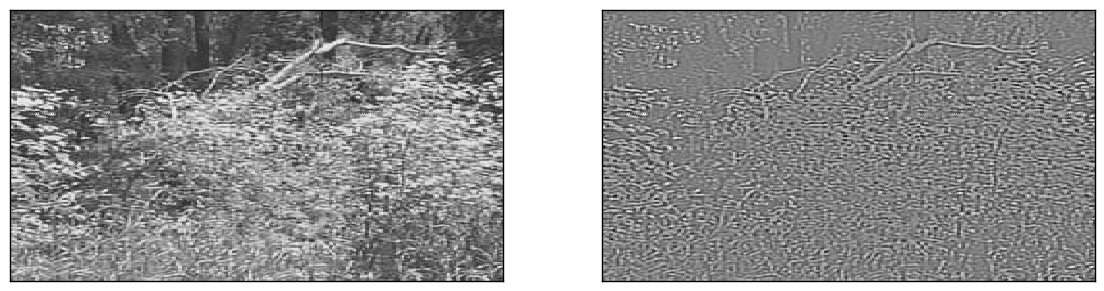

Using image  Mdn_N328009.jpg


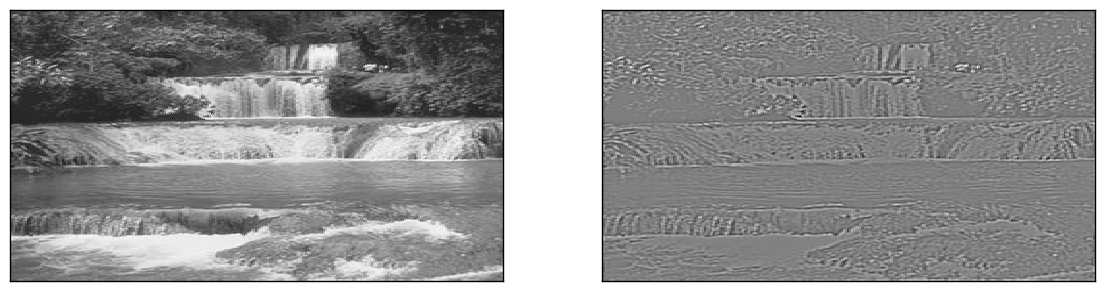

Using image  Bda_room165.jpg


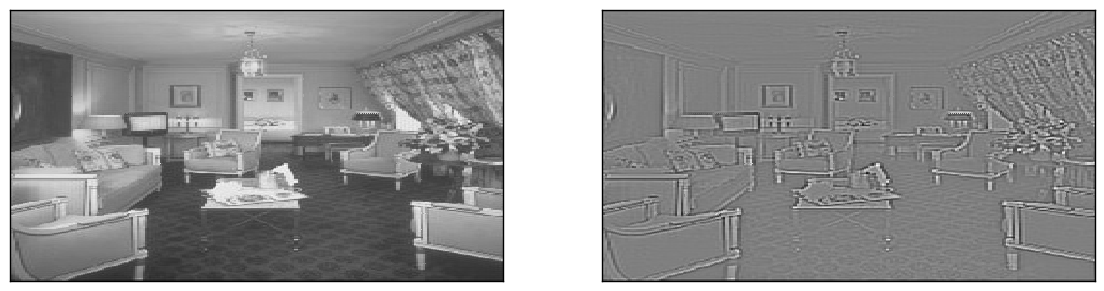

Using image  Hda_obj296.jpg


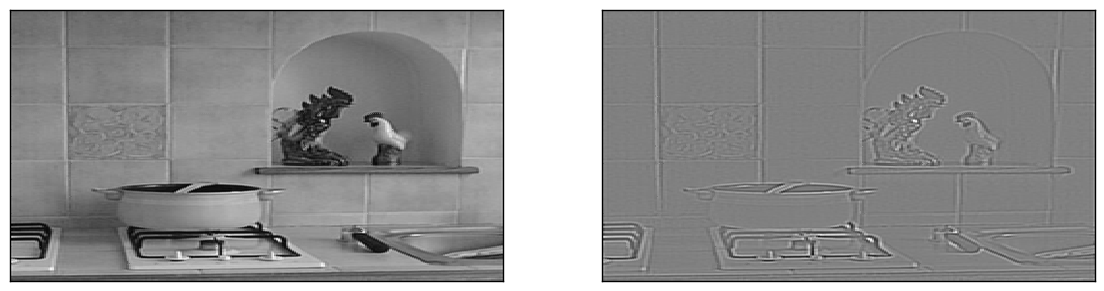

In [44]:
axs = []
im = Image('default_param.py')
im.pe.datapath = 'database/'
for name_database in ['serre07_targets', 'serre07_distractors']:
    for _ in range(4):
        fig = plt.figure(figsize=(14, 3.5))
        image, filename, croparea = im.patch(name_database, )
        ax = fig.add_subplot(1, 2, 1)
        fig , ax = im.imshow(image, fig=fig, ax=ax)
        ax = fig.add_subplot(1, 2, 2)
        fig , ax = im.imshow(im.whitening(image), fig=fig, ax=ax)
        plt.show()

[Back to top](#SLIP)

## more book keeping

In [45]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

2016-11-08T09:42:52+01:00

CPython 3.5.2
IPython 5.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)
system     : Darwin
release    : 16.1.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


[Back to top](#SLIP)